# **Personal Identity**

Nama  : [Antonius Wisnumurti Sulistyanto](https://www.linkedin.com/in/antonius-wisnumurti-sulistyanto/)

Kelas : DS Batch 33 A

# Understand Data

This data orign from [Kaggle](https://www.kaggle.com/datasets/sahilprajapati143/retail-analysis-large-dataset), it represent transaction of retail company from 2023 - 2024. This data includes various attributes such as customer ID, name, email, phone, address, city, state, zipcode, country, age, gender, income, customer segment, last purchase date, total purchases, amount spent, product category, product brand, product type, feedback, shipping method, payment method, and order status.

## Data Dictionary
- Transaction_ID: it represent customers transactions id
- Customer_ID: this is a customers id without it nothing possible
- Name: customers names here
- Email: customers and users emails
- Phone: cust. phone no
- Address: their address
- City: cust. city
- State: their state
- Zipcode: their zipcode
- Country: customer country
- Age: their age
- Gender: gender
- Income: cust. income like : high , low
- Customer_Segment: segment like : regular ,vip like
- Date: dates of purchase
- Year: year
- Month: month of purchase
- Time: time for purchasing
- Total_Purchases: total how many purchase
- Amount: amount spend
- Total_Amount: total amount spended here
- Product_Category: products category
- Product_Brand: brand
- Product_Type: their type
- Feedback: customer feedback
- Shipping_Method: shipping type : like : same day etc.
- Payment_Method: payment method like : cash
- Order_Status: order status : pending , completed
- Ratings: product ratings
- products: products names

# Bussines Understanding
Retail company have great total transactions in USA, want to make prediction model for customer churn based on RFM that have been created so that company can know how much customers stayed to visited our store, and who wont to comeback to us and ultimately company can make business, marketing, and sales strategies to both of customers and then increased revenue

# Questions


1. How much persentation between customer churn and who doesn't?
2. Identifying what kind of features that affected customers to churn
3. Based on features that affected churn, what kind of reccomendation will you give?

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

I have put my dataset in a google drive folder and I need to mount the google drive to access it.

In [4]:
#set up connection to google drive
from google.colab import drive
drive.mount('/content/drive/')

data_path = '/content/drive/My Drive/Portofilio DS33A - Antonius Wisnumurti Sulistyanto/Final Project DS - Antonius Wisnumurti Sulistyanto/'

Mounted at /content/drive/


# Read Data

## 1. Read data set from csv file

In [5]:
#load data
data_1 = pd.read_csv(data_path + 'new_retail_data.csv')
data_1.sample(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
18685,6591111.0,65891.0,Vanessa Clay,Cody56@gmail.com,9.975556e+09,4524 Maldonado Cove,Fort Worth,New Mexico,91829.0,USA,19.0,Female,Medium,New,3/26/2023,2023.0,March,2:47:59,3.0,144.812320,434.436960,Electronics,Samsung,Smartphone,Good,Same-Day,Debit Card,Delivered,3.0,Huawei P
255856,6517572.0,35897.0,Daniel Foster,Michael62@gmail.com,8.286478e+09,9644 Shannon Landing Apt. 537,Quebec City,Ontario,54441.0,Canada,31.0,Male,Medium,New,12/2/2023,2023.0,December,0:44:36,4.0,107.280111,429.120443,Grocery,Nestle,Chocolate,Good,Standard,Cash,Pending,3.0,Milk chocolate
264351,6868812.0,17705.0,Katie Davis,Michael43@gmail.com,2.973317e+09,933 Mark Grove,Edinburgh,England,32607.0,UK,49.0,Female,High,New,7/15/2023,2023.0,April,2:43:48,4.0,229.663751,918.655006,Electronics,Mitsubhisi,Mitsubishi 1.5 Ton 3 Star Split AC,Good,Same-Day,Credit Card,Delivered,4.0,Ductless AC
37102,1755087.0,59046.0,Meghan Swanson,Arthur45@gmail.com,3.307612e+09,9430 Levine Stravenue,Hamilton,Ontario,50582.0,Canada,22.0,Female,Medium,Regular,1/12/2024,2024.0,January,3:52:28,7.0,453.549989,3174.849922,Clothing,Zara,Dress,Average,Same-Day,PayPal,Delivered,2.0,Sheath dress
70391,4641977.0,51417.0,Julie Rivera,Laura35@gmail.com,4.345828e+09,5815 Krystal Highway,Chicago,Kentucky,41538.0,USA,20.0,Female,High,Premium,7/3/2023,2023.0,July,15:13:09,3.0,304.157771,912.473313,Clothing,Nike,Shoes,Bad,Standard,Cash,Pending,1.0,Sneakers


## 2. Check data types for every columns

In [6]:
#info data
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

- Total Column are 30 with rows 302010
- All columns have correct data type, except Date, Year, Month, and Time should convert to date

## 3. Check duplicated value in every column

In [7]:
#check duplicate values
print('Duplicate values is ', data_1.duplicated().sum())

Duplicate values is  4


In [8]:
#shows all duplicate values
data_1[data_1.duplicated(keep = False)]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
181615,4942326.0,25416.0,Pamela Martin,Christine83@gmail.com,6.657934e+09,9851 Myers Tunnel,Leicester,England,57655.0,UK,63.0,Male,Low,Regular,5/5/2023,2023.0,May,4:17:21,8.0,191.906886,1535.255087,Clothing,Adidas,Jacket,Average,Same-Day,Cash,Pending,2.0,Varsity jacket
182139,3200766.0,49598.0,Mikayla Mueller,Kenneth43@gmail.com,6.980439e+09,716 Joshua Rapids Apt. 790,Bremen,Berlin,64747.0,Germany,59.0,Male,Low,New,11/23/2023,2023.0,November,15:35:49,9.0,272.327418,2450.946762,Grocery,Pepsi,Soft Drink,Bad,Standard,Cash,Pending,1.0,Iced tea
190525,5340129.0,29920.0,Collin Davis,Courtney47@gmail.com,4.087767e+09,371 Cynthia Drives Suite 699,Wollongong,New South Wales,47758.0,Australia,54.0,Male,Low,New,12/19/2023,2023.0,December,11:33:48,6.0,NaN,2201.568075,Grocery,Pepsi,Soft Drink,Excellent,Express,Cash,Delivered,4.0,Fruit punch
292839,4476510.0,20103.0,Christine Kim,James11@gmail.com,2.383778e+09,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.0,Canada,54.0,Female,Low,Regular,12/10/2023,2023.0,December,1:09:09,7.0,134.374182,940.619277,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.0,Off-the-shoulder tee
299759,4476510.0,20103.0,Christine Kim,James11@gmail.com,2.383778e+09,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.0,Canada,54.0,Female,Low,Regular,12/10/2023,2023.0,December,1:09:09,7.0,134.374182,940.619277,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.0,Off-the-shoulder tee
301094,5340129.0,29920.0,Collin Davis,Courtney47@gmail.com,4.087767e+09,371 Cynthia Drives Suite 699,Wollongong,New South Wales,47758.0,Australia,54.0,Male,Low,New,12/19/2023,2023.0,December,11:33:48,6.0,NaN,2201.568075,Grocery,Pepsi,Soft Drink,Excellent,Express,Cash,Delivered,4.0,Fruit punch
301362,4942326.0,25416.0,Pamela Martin,Christine83@gmail.com,6.657934e+09,9851 Myers Tunnel,Leicester,England,57655.0,UK,63.0,Male,Low,Regular,5/5/2023,2023.0,May,4:17:21,8.0,191.906886,1535.255087,Clothing,Adidas,Jacket,Average,Same-Day,Cash,Pending,2.0,Varsity jacket
301486,3200766.0,49598.0,Mikayla Mueller,Kenneth43@gmail.com,6.980439e+09,716 Joshua Rapids Apt. 790,Bremen,Berlin,64747.0,Germany,59.0,Male,Low,New,11/23/2023,2023.0,November,15:35:49,9.0,272.327418,2450.946762,Grocery,Pepsi,Soft Drink,Bad,Standard,Cash,Pending,1.0,Iced tea


- There are 8 rows that contain same transaction_id, because transaction_id is a unique values that represent different between one transaction with others, and all row have same values either

## 4. Check miss value in every columns

In [9]:
#check miss value
miss_value = data_1.isnull().sum().reset_index().rename(columns = {'index':'column', 0:'miss_value'})
miss_value

,column,miss_value
0,Transaction_ID,333
1,Customer_ID,308
2,Name,382
3,Email,347
4,Phone,362
5,Address,315
6,City,248
7,State,281
8,Zipcode,340
9,Country,271


- There are lot of missing values in every columns but range of means value only from 100 until less than 400
- If I have 300k+ rows, percentage of miss valeus in every columns are around less than 1%
- But I will check percentage from every columns later at Data Cleaning section

## 5. Check values doesn't match with column name

In [10]:
#check values doesn't match with column
list_column = data_1.columns
for x in list_column:
  print(f'-------------------------------{x}-------------------------------')
  jumlah_value = data_1[x].value_counts().sort_index().reset_index()
  display(jumlah_value)

-------------------------------Transaction_ID-------------------------------


,Transaction_ID,count
0,1000007.0,1
1,1000043.0,1
2,1000073.0,1
3,1000088.0,1
4,1000154.0,1
...,...,...
294456,9999823.0,1
294457,9999909.0,1
294458,9999922.0,1
294459,9999945.0,1


-------------------------------Customer_ID-------------------------------


,Customer_ID,count
0,10000.0,4
1,10001.0,5
2,10002.0,5
3,10003.0,2
4,10004.0,2
...,...,...
86761,99995.0,8
86762,99996.0,4
86763,99997.0,4
86764,99998.0,5


-------------------------------Name-------------------------------


,Name,count
0,Aaron Adams,3
1,Aaron Aguilar,1
2,Aaron Alexander,2
3,Aaron Allen,3
4,Aaron Allen PhD,1
...,...,...
159385,Zoe Smith,3
159386,Zoe Stewart,1
159387,Zoe Torres,1
159388,Zoe Wade,1


-------------------------------Email-------------------------------


,Email,count
0,Aaron100@gmail.com,11
1,Aaron10@gmail.com,11
2,Aaron11@gmail.com,13
3,Aaron12@gmail.com,10
4,Aaron13@gmail.com,7
...,...,...
52892,Zoe93@gmail.com,1
52893,Zoe95@gmail.com,1
52894,Zoe96@gmail.com,2
52895,Zoe97@gmail.com,1


-------------------------------Phone-------------------------------


,Phone,count
0,1.000049e+09,1
1,1.000051e+09,1
2,1.000061e+09,1
3,1.000135e+09,1
4,1.000140e+09,1
...,...,...
299290,9.999835e+09,1
299291,9.999896e+09,1
299292,9.999910e+09,1
299293,9.999975e+09,1


-------------------------------Address-------------------------------


,Address,count
0,000 Alex Burg Apt. 421,1
1,000 Alexander Estate,1
2,000 Ana Rapids Apt. 400,1
3,000 Anderson Burg Suite 449,1
4,000 Andrade Turnpike Apt. 044,1
...,...,...
299324,99993 Nguyen Forges Apt. 544,1
299325,99993 Reginald Wells Apt. 737,1
299326,99995 Carr Port,1
299327,99996 Cox Court Suite 855,1


-------------------------------City-------------------------------


,City,count
0,Adelaide,2221
1,Albuquerque,907
2,Albury-Wodonga,2275
3,Arlington,856
4,Atlanta,890
...,...,...
125,Wichita,873
126,Windsor,2190
127,Winnipeg,2406
128,Wollongong,2262


-------------------------------State-------------------------------


,State,count
0,Alabama,909
1,Alaska,887
2,Arizona,863
3,Arkansas,896
4,Berlin,52822
5,California,952
6,Colorado,883
7,Connecticut,21658
8,Delaware,904
9,England,63059


-------------------------------Zipcode-------------------------------


,Zipcode,count
0,501.0,2
1,502.0,1
2,503.0,1
3,504.0,1
4,505.0,2
...,...,...
93973,99945.0,5
93974,99946.0,2
93975,99947.0,5
93976,99948.0,5


-------------------------------Country-------------------------------


,Country,count
0,Australia,45319
1,Canada,45301
2,Germany,52830
3,UK,63066
4,USA,95223


-------------------------------Age-------------------------------


,Age,count
0,18.0,2480
1,19.0,16846
2,20.0,34678
3,21.0,8054
4,22.0,23023
5,23.0,18033
6,24.0,6189
7,25.0,2594
8,26.0,24671
9,27.0,2571


-------------------------------Gender-------------------------------


,Gender,count
0,Female,114094
1,Male,187599


-------------------------------Income-------------------------------


,Income,count
0,High,75229
1,Low,96261
2,Medium,130230


-------------------------------Customer_Segment-------------------------------


,Customer_Segment,count
0,New,91187
1,Premium,64387
2,Regular,146221


-------------------------------Date-------------------------------


,Date,count
0,1/1/2024,831
1,1/10/2024,859
2,1/11/2024,775
3,1/12/2024,890
4,1/13/2024,791
...,...,...
361,9/5/2023,862
362,9/6/2023,857
363,9/7/2023,801
364,9/8/2023,863


-------------------------------Year-------------------------------


,Year,count
0,2023.0,251852
1,2024.0,49808


-------------------------------Month-------------------------------


,Month,count
0,April,41301
1,August,33012
2,December,18945
3,February,18259
4,January,37284
5,July,30886
6,June,18380
7,March,19142
8,May,28331
9,November,18416


-------------------------------Time-------------------------------


,Time,count
0,0:00:00,2
1,0:00:01,2
2,0:00:02,2
3,0:00:03,7
4,0:00:04,2
...,...,...
83672,9:59:55,1
83673,9:59:56,2
83674,9:59:57,6
83675,9:59:58,4


-------------------------------Total_Purchases-------------------------------


,Total_Purchases,count
0,1.0,31894
1,2.0,31908
2,3.0,31862
3,4.0,31575
4,5.0,31921
5,6.0,28535
6,7.0,28445
7,8.0,28702
8,9.0,28455
9,10.0,28352


-------------------------------Amount-------------------------------


,Amount,count
0,10.000219,1
1,10.000753,1
2,10.003750,1
3,10.006109,1
4,10.006769,1
...,...,...
299292,499.993884,1
299293,499.995511,1
299294,499.996681,1
299295,499.997024,1


-------------------------------Total_Amount-------------------------------


,Total_Amount,count
0,10.003750,1
1,10.011336,1
2,10.056353,1
3,10.063269,1
4,10.068154,1
...,...,...
299300,4998.603558,1
299301,4998.723479,1
299302,4999.171428,1
299303,4999.340097,1


-------------------------------Product_Category-------------------------------


,Product_Category,count
0,Books,54622
1,Clothing,54741
2,Electronics,71196
3,Grocery,66786
4,Home Decor,54382


-------------------------------Product_Brand-------------------------------


,Product_Brand,count
0,Adidas,18238
1,Apple,18073
2,Bed Bath & Beyond,18244
3,BlueStar,2256
4,Coca-Cola,18392
5,HarperCollins,18353
6,Home Depot,18145
7,IKEA,17994
8,Mitsubhisi,6724
9,Nestle,18109


-------------------------------Product_Type-------------------------------


,Product_Type,count
0,Bathroom,6026
1,Bedding,6011
2,BlueStar AC,2256
3,Children's,6147
4,Chocolate,6051
5,Coffee,6178
6,Decorations,12178
7,Dress,6123
8,Fiction,18045
9,Fridge,7445


-------------------------------Feedback-------------------------------


,Feedback,count
0,Average,62674
1,Bad,43299
2,Excellent,100755
3,Good,95098


-------------------------------Shipping_Method-------------------------------


,Shipping_Method,count
0,Express,102356
1,Same-Day,104156
2,Standard,95161


-------------------------------Payment_Method-------------------------------


,Payment_Method,count
0,Cash,73810
1,Credit Card,90116
2,Debit Card,76790
3,PayPal,60997


-------------------------------Order_Status-------------------------------


,Order_Status,count
0,Delivered,130449
1,Pending,49103
2,Processing,57199
3,Shipped,65024


-------------------------------Ratings-------------------------------


,Ratings,count
0,1.0,43299
1,2.0,62674
2,3.0,47636
3,4.0,98064
4,5.0,50153


-------------------------------products-------------------------------


,products,count
0,4K TV,1195
1,A-line dress,620
2,Acer Iconia Tab,1268
3,Acer Swift,574
4,Action,618
...,...,...
313,Wrap dress,617
314,Wrench,577
315,Xiaomi Mi,1834
316,iPad,1185


- There's no values that don't match with column

## 6. Descriptive Statistic

In [11]:
#descriptive statistic for numerical type
descriptive_numerical = data_1.describe()
descriptive_numerical

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


- Transcation_ID, Customer_ID, Phone, and Zipcode have numerical data type but it only use as identity
- Age, Total_Purchases, Amount, and Ratings have symetrical distribution, becasue mean and median value is not have huge gap
- Ratings and Year have discrete, have certain limit values which mean can't be calculated

In [12]:
#descriptive statistic for categorical type
descriptive_categorical = data_1.describe(include='object').T
descriptive_categorical

,count,unique,top,freq
Name,301628,159390,Michael Smith,144
Email,301663,52897,Michael59@gmail.com,93
Address,301695,299329,34070 Angela Islands,2
City,301762,130,Chicago,21652
State,301729,54,England,63059
Country,301739,5,USA,95223
Gender,301693,2,Male,187599
Income,301720,3,Medium,130230
Customer_Segment,301795,3,Regular,146221
Date,301651,366,11/22/2023,910


- City that have most huge transaction is Chicago
- This retail company have a lot Male buyers
- November 22, 2023 is day when transaction at peak
- Income class Middle is greater than Low, or High

# Data Cleaning

## 1. Filtered Data in USA country

In [13]:
#filtered data
data_usa = data_1[data_1['Country'] == 'USA']
data_usa.sample(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
196250,3772698.0,64700.0,Emily Park,Clayton97@gmail.com,3.405211e+09,410 Annette Walk Apt. 316,Houston,Indiana,47405.0,USA,22.0,Male,Medium,Premium,6/8/2023,2023.0,June,0:18:47,8.0,337.832883,2702.663064,Grocery,Coca-Cola,Juice,Bad,Express,Cash,Processing,1.0,Orange juice
86333,2515145.0,49197.0,Donald Harper,Charles79@gmail.com,3.863556e+09,091 Heather Villages,Chicago,Connecticut,75698.0,USA,34.0,Male,Medium,Regular,6/3/2023,2023.0,June,1:12:28,3.0,68.535470,205.606411,Grocery,Pepsi,Water,Good,Standard,Cash,Processing,4.0,Alkaline water
125253,7344559.0,87617.0,Dylan Fisher,Hannah60@gmail.com,2.086340e+09,5204 Hooper Port,Baltimore,Georgia,31977.0,USA,55.0,Male,Low,Regular,12/16/2023,2023.0,February,9:38:43,8.0,166.173737,1329.389895,Electronics,Apple,Laptop,Excellent,Same-Day,Credit Card,Delivered,5.0,Dell XPS
121445,2819764.0,51562.0,Elijah Martin,Kayla65@gmail.com,4.717574e+09,526 Watkins Park,Boston,Wyoming,82929.0,USA,46.0,Female,High,Premium,9/27/2023,2023.0,September,2:14:42,5.0,310.440750,1552.203752,Electronics,Sony,Headphones,Excellent,Same-Day,Credit Card,Delivered,5.0,DJ headphones
19372,1552682.0,14641.0,Catherine Wiggins,Jose57@gmail.com,2.248481e+09,283 Russell Lock,Fort Worth,New Mexico,57758.0,USA,19.0,Female,Medium,New,10/1/2023,2023.0,October,18:33:19,1.0,292.669349,292.669349,Books,HarperCollins,Non-Fiction,Bad,Express,Debit Card,Delivered,1.0,Health


## 2. Alter Data type

In [14]:
#check data type
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95223 entries, 17800 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    95103 non-null  float64
 1   Customer_ID       95122 non-null  float64
 2   Name              95102 non-null  object 
 3   Email             95120 non-null  object 
 4   Phone             95104 non-null  float64
 5   Address           95115 non-null  object 
 6   City              95174 non-null  object 
 7   State             95174 non-null  object 
 8   Zipcode           95109 non-null  float64
 9   Country           95223 non-null  object 
 10  Age               95197 non-null  float64
 11  Gender            95122 non-null  object 
 12  Income            95132 non-null  object 
 13  Customer_Segment  95154 non-null  object 
 14  Date              95103 non-null  object 
 15  Year              95111 non-null  float64
 16  Month             95148 non-null  object

- I only alter data type of Date, because it contain all parts od dates, like day, month, and year

In [15]:
#alter data type column date
data_usa['Date'] = pd.to_datetime(data_usa['Date'])
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95223 entries, 17800 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    95103 non-null  float64       
 1   Customer_ID       95122 non-null  float64       
 2   Name              95102 non-null  object        
 3   Email             95120 non-null  object        
 4   Phone             95104 non-null  float64       
 5   Address           95115 non-null  object        
 6   City              95174 non-null  object        
 7   State             95174 non-null  object        
 8   Zipcode           95109 non-null  float64       
 9   Country           95223 non-null  object        
 10  Age               95197 non-null  float64       
 11  Gender            95122 non-null  object        
 12  Income            95132 non-null  object        
 13  Customer_Segment  95154 non-null  object        
 14  Date              9510

/tmp/ipython-input-412134566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa['Date'] = pd.to_datetime(data_usa['Date'])


In [16]:
#check satistic Date volumn
data_usa['Date'].describe()

,Date
count,95103
mean,2023-08-30 10:13:58.307939840
min,2023-03-01 00:00:00
25%,2023-05-31 00:00:00
50%,2023-08-30 00:00:00
75%,2023-11-30 00:00:00
max,2024-02-29 00:00:00


- Data type of Date have been altered to datetime
- First record transaction happen in 1 March 2023 and ended in 29 February 2024, +/- 1year

## 3. Duplicate Handling

In [17]:
#drop duplicate values
print('Duplicate Values is ', data_usa.duplicated().sum())

duplicate_values = data_usa[data_usa.duplicated(keep = False)].sort_values('Transaction_ID')
duplicate_values

Duplicate Values is  0


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products


- There are no duplicated values after we hav been altered data types

## 4. Handle Missing Values

In [18]:
#shows percentage of missing values in every columns
total_rows = len(data_usa)

for column in data_usa.columns:
    missing_count = data_usa[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column: '{column}', miss values: {missing_count}, total percentage: ({missing_percentage:.2f}%)")

Column: 'Transaction_ID', miss values: 120, total percentage: (0.13%)
Column: 'Customer_ID', miss values: 101, total percentage: (0.11%)
Column: 'Name', miss values: 121, total percentage: (0.13%)
Column: 'Email', miss values: 103, total percentage: (0.11%)
Column: 'Phone', miss values: 119, total percentage: (0.12%)
Column: 'Address', miss values: 108, total percentage: (0.11%)
Column: 'City', miss values: 49, total percentage: (0.05%)
Column: 'State', miss values: 49, total percentage: (0.05%)
Column: 'Zipcode', miss values: 114, total percentage: (0.12%)
Column: 'Country', miss values: 0, total percentage: (0.00%)
Column: 'Age', miss values: 26, total percentage: (0.03%)
Column: 'Gender', miss values: 101, total percentage: (0.11%)
Column: 'Income', miss values: 91, total percentage: (0.10%)
Column: 'Customer_Segment', miss values: 69, total percentage: (0.07%)
Column: 'Date', miss values: 120, total percentage: (0.13%)
Column: 'Year', miss values: 112, total percentage: (0.12%)
Col

- Every columns have missing values, range 0 - 120. It's less than 1%
- I will replace miss values columns Total_Purchase with Total_Amount/Amount
- Replace miss values columns Amount with Total_Amount/Total_Purchase
- Replace miss values columns Total_Amount with Total_Purchase * Amount
- For Transaction_ID, I will just let it be because it's less than 1%
- For Customer_ID I will drop miss values becuse customers who haven't ID maybe ain't our loyal customers just guest
- For columns categorical I will replace with mode

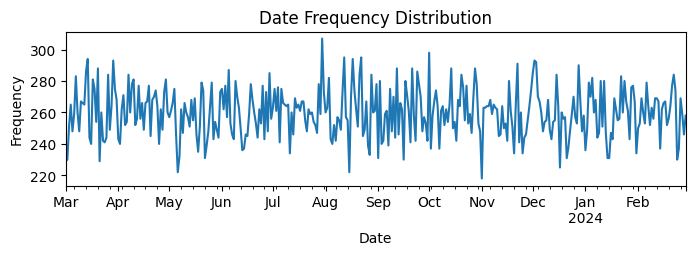

In [19]:
#check distribution column Date
data_usa['Date'].value_counts().sort_index().plot(kind='line', figsize=(8,2))
plt.title('Date Frequency Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

- From chart I can see ditribution of Date seems balanced, and I will replace miss values within it with median

In [20]:
#fill missing Total_Purchases
mask_tp = data_usa['Total_Purchases'].isna() & data_usa['Total_Amount'].notna() & data_usa['Amount'].notna()
data_usa.loc[mask_tp, 'Total_Purchases'] = data_usa.loc[mask_tp, 'Total_Amount'] / data_usa.loc[mask_tp, 'Amount']

#fill missing Amount
mask_amt = data_usa['Amount'].isna() & data_usa['Total_Amount'].notna() & data_usa['Total_Purchases'].notna()
data_usa.loc[mask_amt, 'Amount'] = data_usa.loc[mask_amt, 'Total_Amount'] / data_usa.loc[mask_amt, 'Total_Purchases']

#fill missing Total_Amount
mask_ta = data_usa['Total_Amount'].isna() & data_usa['Total_Purchases'].notna() & data_usa['Amount'].notna()
data_usa.loc[mask_ta, 'Total_Amount'] = data_usa.loc[mask_ta, 'Total_Purchases'] * data_usa.loc[mask_ta, 'Amount']

#fill missing Customer_ID with Unknown
data_usa = data_usa.dropna(subset = ['Customer_ID'])

In [21]:
#replace miss values with median and mode
list_column_miss = ['City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Date', 'Product_Category', 'Product_Brand']
for col in list_column_miss:
    if data_usa[col].dtype == 'object':
       data_usa[col].fillna(data_usa[col].mode()[0], inplace=True)
    elif data_usa[col].dtype == 'datetime64[ns]':
       data_usa[col].fillna(data_usa[col].median(), inplace=True)
    else:
       data_usa[col].fillna(data_usa[col].median(), inplace=True)

/tmp/ipython-input-1812276011.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_usa[col].fillna(data_usa[col].mode()[0], inplace=True)
/tmp/ipython-input-1812276011.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [22]:
#drop values from rest columns
data_usa = data_usa.dropna(subset=['Transaction_ID', 'Name', 'Email', 'Phone', 'Address', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings'])

- Because the rest column have not quite many values in each columns, I decided to drop all miss values for each columns

In [23]:
#check miss values
data_usa.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Name,0
Email,0
Phone,0
Address,0
City,0
State,0
Zipcode,0
Country,0


- All missing values are already gone

## 5. Drop useless columns

In [24]:
#drop for not utilize columns
list_col_lessuse = ['Year', 'Month', 'Time', 'Customer_Segment']

for x in list_col_lessuse:
  data_usa = data_usa.drop(x, axis = 1)

- We decided to dropped Year, Month, Time, and Customer_Segment because We have Date that have all values in Year, Month, and Time, and then Customer_Segment will not use full since We will make RFM to make new customer segment

# Manipulation Data

## Decided Analyze Day

In [25]:
#import libraries timedelta
from datetime import timedelta

#dicided day one day after last transaction
analyze_date = data_usa['Date'].max() + timedelta(days=1)
analyze_date

Timestamp('2024-03-01 00:00:00')

- Because last transaction happen in 29 February 2024, I diceded to analyze record of transaction 1 day after

## RFM for Customer Segmentation

### Recency
- Count of days between analyze date, and last transaction of customer
- Get smaller number it means customer recently made a transaction

#### Make last transaction for every customers

In [26]:
#recency formula
last_transaction = data_usa.groupby('Customer_ID').agg({'Date':'max'})
last_transaction = last_transaction.reset_index()
last_transaction = last_transaction.rename(columns = {'Date':'Last_Date'})
last_transaction.sample(5)

,Customer_ID,Last_Date
34613,63670.0,2023-05-03
41180,73820.0,2023-12-19
15861,34527.0,2023-07-15
1202,11831.0,2023-08-25
3575,15479.0,2024-01-11


- last_transaction table is last date Customer made a transaction

#### Apply Recency formula

In [27]:
#recency formula
recency = last_transaction
recency ['Recency'] = (analyze_date - last_transaction ['Last_Date']).dt.days
recency.sample(5)

,Customer_ID,Last_Date,Recency
32312,60086.0,2023-07-17,228
15699,34278.0,2024-01-12,49
35485,65002.0,2023-11-03,119
24929,48698.0,2023-11-29,93
27351,52450.0,2023-05-20,286


- Calculated between analyze date and last day customer made purchase and then store it to Revcency column

### Frequency
- Calcualted how much transaction that every customers made

#### Apply Frequency formula

In [28]:
#frequency formula
frequency = data_usa.groupby('Customer_ID').agg({'Transaction_ID':'count'})
frequency = frequency.reset_index()
frequency = frequency.rename(columns = {'Transaction_ID':'Frequency'})
frequency.sample(5)

,Customer_ID,Frequency
39824,71714.0,1
49540,86762.0,2
44011,78126.0,1
52691,91554.0,2
44082,78220.0,2


- This table calculated how much customer made transactions and store values in Frquency column

### Monetary
- How much total money that cusotmers spended

#### Apply Monetary formula

In [29]:
#monetary formula
monetary = data_usa.groupby('Customer_ID').agg({'Total_Amount':'sum'})
monetary = monetary.reset_index()
monetary = monetary.rename(columns = {'Total_Amount':'Monetary'})
monetary.sample(5)

,Customer_ID,Monetary
16453,35434.0,367.698500
29882,56341.0,4573.123998
26836,51674.0,2924.777427
16998,36286.0,103.017917
43154,76837.0,480.652790


- This table store total of purchase for every customers

### Merge all RFM table

In [30]:
#merge all recency, frequency, and monetary become one with main table
data_usa = data_usa.merge(recency[['Customer_ID', 'Last_Date', 'Recency']], on='Customer_ID', how='left')
data_usa = data_usa.merge(frequency[['Customer_ID', 'Frequency']], on='Customer_ID', how='left')
data_usa = data_usa.merge(monetary[['Customer_ID', 'Monetary']], on='Customer_ID', how='left')
data_usa.sample(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Last_Date,Recency,Frequency,Monetary
67724,1584410.0,10617.0,Travis Lawson,Julie71@gmail.com,4.169665e+09,05842 Laura Unions Apt. 309,El Paso,Pennsylvania,19210.0,USA,40.0,Male,Medium,2023-03-21,1.0,206.610467,206.610467,Home Decor,IKEA,Furniture,Bad,Express,Cash,Delivered,1.0,Dresser,2023-04-16,320,2,1738.264389
25105,3352462.0,94851.0,Karen Shaw,Ashley57@gmail.com,2.233074e+09,389 Daniel Burg Apt. 931,Chicago,Connecticut,86858.0,USA,34.0,Female,High,2023-12-08,7.0,70.865988,496.061915,Grocery,Pepsi,Water,Good,Same-Day,Cash,Shipped,4.0,Flavored water,2023-12-08,84,1,496.061915
90927,2413849.0,51821.0,Patrick White,Allen79@gmail.com,6.441674e+09,77698 Debbie Avenue,Albuquerque,New York,11015.0,USA,46.0,Male,High,2023-12-23,1.0,394.059147,394.059147,Books,Penguin Books,Fiction,Bad,Express,Debit Card,Processing,1.0,Fantasy,2023-12-23,69,2,2673.009436
10693,5571946.0,51260.0,Tami Cuevas,Andrew30@gmail.com,9.370037e+09,953 Peters Mews,El Paso,Tennessee,38159.0,USA,20.0,Male,Medium,2023-10-05,3.0,464.057432,1392.172295,Home Decor,IKEA,Lighting,Excellent,Express,Debit Card,Pending,4.0,Chandeliers,2023-10-05,148,1,1392.172295
13554,2522545.0,96566.0,Randy Patterson,Mary73@gmail.com,8.282388e+09,492 Christina Terrace Apt. 254,Chicago,Connecticut,51910.0,USA,20.0,Male,Low,2023-08-25,9.0,347.648890,3128.840013,Clothing,Adidas,Shoes,Bad,Standard,Credit Card,Shipped,1.0,High heels,2023-08-25,189,1,3128.840013


- Table recency, frequency, and monetary have been merged with main table based on Customer_ID

### Make RFM Score

In [31]:
#make RFM score based on quartile
re_quartiles = data_usa['Recency'].quantile([0.25, 0.50, 0.75]).to_dict()
fre_quartiles = data_usa['Frequency'].quantile([0.25, 0.50, 0.75]).to_dict()
mo_quartiles = data_usa['Monetary'].quantile([0.25, 0.50, 0.75]).to_dict()

- I tried to make RFM score based on quartile and stored it to different variable

In [32]:
#make an fucntion to give rfm score
def rfm_score(x, quartile):
  if x <= quartile[0.25]:
    return 1
  elif x <= quartile[0.50]:
    return 2
  elif x <= quartile[0.75]:
    return 3
  else:
    return 4

#apply function rfm_score
data_usa['R_Score'] = data_usa['Recency'].apply(lambda x : rfm_score(x, re_quartiles))
data_usa['F_Score'] = data_usa['Frequency'].apply(lambda x : rfm_score(x, fre_quartiles))
data_usa['M_Score'] = data_usa['Monetary'].apply(lambda x : rfm_score(x, mo_quartiles))

- RFM score for this analysis is if it get higher will better
- Rececny --> 1 = old, 4 = recent
- Frequency --> 1 = sometimes, 4 = often
- Monetary --> 1 = small purcahse, 4 = big purchase

In [33]:
#sum all R, F, an M score then storeed it in RFM_Total
data_usa['RFM_Total'] = data_usa['R_Score'] + data_usa['F_Score'] + data_usa['M_Score']
data_usa.sample(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Last_Date,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total
46100,4932362.0,99494.0,Michelle Diaz,Heidi59@gmail.com,6.499167e+09,080 Robert Springs,San Francisco,Maine,22139.0,USA,26.0,Male,High,2023-04-04,10.0,52.041178,520.411783,Home Decor,Home Depot,Decorations,Excellent,Standard,Debit Card,Delivered,5.0,Rugs,2023-04-04,332,1,520.411783,4,1,1,6
143,1350412.0,36632.0,Timothy Rogers DVM,Edward44@gmail.com,9.027565e+09,47050 Gloria Lights Suite 597,Fort Worth,New Mexico,55001.0,USA,19.0,Male,Medium,2023-07-15,1.0,38.564545,38.564545,Home Decor,Home Depot,Furniture,Excellent,Express,PayPal,Delivered,5.0,Bookshelf,2023-09-10,173,2,534.722275,3,2,1,6
7072,5841818.0,78159.0,David Woods,Tyrone5@gmail.com,1.985129e+09,036 Harris Coves,Albuquerque,Illinois,62803.0,USA,20.0,Male,High,2023-07-11,7.0,488.666941,3420.668589,Home Decor,IKEA,Decorations,Bad,Same-Day,Cash,Delivered,1.0,Wall art,2023-07-11,234,1,3420.668589,4,1,3,8
86814,9685926.0,19594.0,Bryan Craig,Andrew58@gmail.com,6.800229e+09,0299 Sean Summit Suite 630,Baltimore,California,92633.0,USA,42.0,Male,Medium,2023-05-08,1.0,432.069830,432.069830,Electronics,Mitsubhisi,Mitsubishi 1.5 Ton 3 Star Split AC,Excellent,Same-Day,Credit Card,Delivered,4.0,Central AC,2024-02-28,2,2,938.652867,1,2,1,4
56126,9241131.0,84631.0,Bryan Sanders Jr.,Robert61@gmail.com,5.452492e+09,7833 Evans Landing Suite 695,Boston,Georgia,85208.0,USA,23.0,Male,High,2023-11-09,9.0,199.049983,1791.449849,Clothing,Adidas,Jacket,Good,Standard,Debit Card,Processing,3.0,Bomber jacket,2024-01-28,33,3,2562.066607,1,3,3,7


- I sum all of R, F, and M score and stored it to RFM_Total
- Maximmum total from RFM_Segment is 12
- Minimum total from RFM_Segment is 3

### Define Class for score in RFM_Total

In [34]:
#function to define class
def class_segment(score):
    if score == 12:
        return 'Champions'
    elif score >= 9:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential Loyalist'
    else:
        return 'Needs Attention'

#apply function class_segment then stored it in new column
data_usa['Customer_Segment'] = data_usa['RFM_Total'].apply(class_segment)
data_usa.sample(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Last_Date,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total,Customer_Segment
50988,1355869.0,19827.0,Luis Rush,Justin26@gmail.com,7.829840e+09,2407 Amy Island Apt. 412,San Francisco,Maine,38625.0,USA,26.0,Male,High,2023-07-09,1.0,442.423172,442.423172,Clothing,Adidas,Jacket,Good,Same-Day,Debit Card,Delivered,4.0,Puffer jacket,2023-07-09,236,2,1026.400582,4,2,1,7,Potential Loyalist
82945,5444547.0,68065.0,Brian Klein,Sandra87@gmail.com,2.523035e+09,5437 Kellie Ville Suite 547,Philadelphia,Maine,4160.0,USA,26.0,Female,Low,2024-01-03,8.0,477.486327,3819.890617,Electronics,Sony,Headphones,Good,Same-Day,Credit Card,Shipped,4.0,Bluetooth headphones,2024-01-03,58,1,3819.890617,2,1,3,6,Potential Loyalist
70525,4571459.0,99169.0,Kelly Powell,Margaret71@gmail.com,5.489378e+09,2122 Keith Rue Apt. 339,Miami,Wyoming,82039.0,USA,19.0,Female,Low,2023-03-29,3.0,410.259737,1230.779211,Books,Random House,Literature,Excellent,Standard,PayPal,Pending,4.0,Short stories,2023-03-29,338,1,1230.779211,4,1,2,7,Potential Loyalist
10122,8580026.0,95528.0,Tamara Sanchez,Erica100@gmail.com,1.053389e+09,86232 Malik Spur Apt. 286,Phoenix,Nevada,89726.0,USA,20.0,Male,Medium,2023-09-19,2.0,494.208554,988.417108,Home Decor,Bed Bath & Beyond,Bathroom,Bad,Standard,Credit Card,Pending,1.0,Sink,2023-09-19,164,2,1180.077610,3,2,2,7,Potential Loyalist
49557,7017320.0,64622.0,Victoria Zimmerman,Michele59@gmail.com,4.263328e+09,3324 Harris Rest Apt. 305,San Francisco,Maine,57638.0,USA,26.0,Male,High,2023-12-21,7.0,486.768691,3407.380837,Home Decor,IKEA,Decorations,Excellent,Express,Debit Card,Delivered,4.0,Wall art,2023-12-21,71,1,3407.380837,2,1,3,6,Potential Loyalist


In [35]:
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94222 entries, 0 to 94221
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    94222 non-null  float64       
 1   Customer_ID       94222 non-null  float64       
 2   Name              94222 non-null  object        
 3   Email             94222 non-null  object        
 4   Phone             94222 non-null  float64       
 5   Address           94222 non-null  object        
 6   City              94222 non-null  object        
 7   State             94222 non-null  object        
 8   Zipcode           94222 non-null  float64       
 9   Country           94222 non-null  object        
 10  Age               94222 non-null  float64       
 11  Gender            94222 non-null  object        
 12  Income            94222 non-null  object        
 13  Date              94222 non-null  datetime64[ns]
 14  Total_Purchases   9422

Term of class fron RFM_Total:
- Customers that have RFM_Total equal 12 will be define as Champion
- Customers that have RFM_Total equal/greater than 9 will be define as Loyal Customers
- Customers that have RFM_Total equal/greater than 6 will be define as Potential Loyalist
- Customers that have RFM_Total equal/greater than 3 will be define as Need Attention
- Customers that have RFM_Total equal/lower than 2 will be define as At Risk

In [36]:
#drop RFM features
data_usa = data_usa.drop(['Last_Date', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Total'], axis=1)
data_usa.sample(3)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Customer_Segment
73373,6390261.0,54860.0,Jackie Franklin,Melanie62@gmail.com,7.313756e+09,5388 Alisha Key Apt. 742,Oakland,Texas,78172.0,USA,19.0,Male,High,2024-02-08,1.0,272.813306,272.813306,Books,HarperCollins,Fiction,Excellent,Standard,Debit Card,Shipped,4.0,Dystopian,Needs Attention
67926,6385468.0,12994.0,Denise Wright,Roy100@gmail.com,7.439755e+09,940 Hall Hill,San Jose,New York,10888.0,USA,68.0,Female,Medium,2023-09-19,1.0,400.543984,400.543984,Electronics,Apple,Tablet,Bad,Same-Day,PayPal,Shipped,1.0,Acer Iconia Tab,Potential Loyalist
49745,6682780.0,51573.0,John Bell,Lauren92@gmail.com,7.216740e+09,1659 Angela Route,San Francisco,Maine,46337.0,USA,26.0,Female,High,2023-07-30,8.0,339.323119,2714.584955,Home Decor,IKEA,Furniture,Average,Standard,PayPal,Delivered,2.0,Dining table,Potential Loyalist


##Define Churn of Customers

We make another RFM, it will be used for make churn label:
- Recency = gap last transaction of customers with date cut off
- Frequency = how much transactions per customers
- Monetary = average of sales for each customers

We will use Observation window vs. label window method to make Churn label, establish from whether customers make transaction after cut off date within range 90 days

In [37]:
#define churn of customers
cutoff_date =  pd.to_datetime('2023-11-30')
holdout_start = cutoff_date + pd.Timedelta(days = 1)
holdout_end = cutoff_date + pd.Timedelta(days = 90)

In [38]:
#make observation table
observation_table = data_usa[data_usa['Date'] <= cutoff_date].groupby('Customer_ID').agg(
    Frequency=('Transaction_ID', 'nunique'),
    Monetary=('Total_Amount', 'mean'),
    Last_trc=('Date', 'max')
).reset_index()
observation_table['Recency'] = (cutoff_date - observation_table['Last_trc']).dt.days
observation_table.sample(3)

,Customer_ID,Frequency,Monetary,Last_trc,Recency
48013,98540.0,2,1242.948567,2023-05-27,187
25124,56481.0,2,1048.078347,2023-05-19,195
589,11075.0,2,384.372793,2023-08-08,114


In [39]:
#make holdout of customers table
holdout_cust = data_usa[(data_usa['Date'] >= holdout_start) & (data_usa['Date'] <= holdout_end)]['Customer_ID'].unique()

In [40]:
#make churn label
observation_table['Churn'] = observation_table['Customer_ID'].apply(lambda x: 0 if x in holdout_cust else 1)
observation_table.sample(3)

,Customer_ID,Frequency,Monetary,Last_trc,Recency,Churn
16202,40070.0,1,1416.038894,2023-11-29,1,1
21699,50274.0,1,2552.955073,2023-10-22,39,0
26285,58602.0,1,2255.029510,2023-03-03,272,1


In [41]:
#merge with main table
data_usa = data_usa.merge(observation_table[['Customer_ID', 'Frequency', 'Monetary', 'Last_trc', 'Recency', 'Churn']], on='Customer_ID', how='inner')
data_usa.sample(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Customer_Segment,Frequency,Monetary,Last_trc,Recency,Churn
19294,7349420.0,80724.0,Jason Davis,Jessica71@gmail.com,2.326202e+09,82340 Sheri Hill Apt. 595,Chicago,Connecticut,38817.0,USA,34.0,Male,Low,2023-10-03,7.0,446.435216,3125.046509,Books,Penguin Books,Non-Fiction,Good,Express,Cash,Pending,4.0,Self-help,Potential Loyalist,1,3125.046509,2023-10-03,58,1
51382,6071159.0,55785.0,Kathleen Garrison,Brenda24@gmail.com,1.079719e+09,358 Romero Street,Boston,Georgia,82278.0,USA,23.0,Male,High,2023-11-10,10.0,112.718479,1127.184785,Clothing,Adidas,T-shirt,Good,Express,Debit Card,Shipped,4.0,Crop top,Potential Loyalist,2,989.626912,2023-11-10,20,1
41125,3562774.0,72500.0,Dr. Maria Curtis DDS,Gregory11@gmail.com,3.728855e+09,541 Huff Terrace Apt. 533,San Francisco,Maine,46364.0,USA,26.0,Male,High,2023-05-16,3.0,425.878263,1277.634790,Electronics,Apple,Smartphone,Bad,Express,Cash,Delivered,1.0,LG G,Potential Loyalist,1,1277.634790,2023-05-16,198,1
82890,2806806.0,45431.0,Tiffany Thompson,Helen16@gmail.com,5.324501e+09,3072 Nicole Groves Apt. 346,Boston,Wyoming,82978.0,USA,70.0,Male,High,2023-04-25,4.0,323.350892,1293.403570,Grocery,Pepsi,Water,Average,Express,Credit Card,Processing,2.0,Flavored water,Potential Loyalist,1,1293.403570,2023-04-25,219,1
19952,4674613.0,94461.0,David Hernandez,Ryan16@gmail.com,3.189123e+09,25302 James Camp,Chicago,Connecticut,55880.0,USA,34.0,Male,Medium,2023-09-24,3.0,203.949647,611.848942,Clothing,Adidas,Shoes,Excellent,Express,PayPal,Delivered,5.0,Flip flops,Potential Loyalist,2,669.882328,2023-09-24,67,0


In [42]:
#check miss values
data_usa[['Customer_ID', 'Frequency', 'Monetary', 'Recency', 'Last_trc', 'Churn']].isnull().sum()

,0
Customer_ID,0
Frequency,0
Monetary,0
Recency,0
Last_trc,0
Churn,0


In [43]:
#seperated data_usa before 1 December 2023
data_usa = data_usa[data_usa['Date'] < '2023-12-01']
data_usa.value_counts(['Date']).reset_index().sort_values(by='Date', ascending=True)

,Date,count
271,2023-03-01,227
270,2023-03-02,227
186,2023-03-03,250
122,2023-03-04,260
203,2023-03-05,246
...,...,...
222,2023-11-26,242
214,2023-11-27,243
168,2023-11-28,252
101,2023-11-29,262


Data USA already in range March 2023 - November 2023

#EDA

##Churn with Recency

In [44]:
#one row per customer
customers = data_usa.groupby('Customer_ID').agg({
    'Churn': 'first',
    'Recency': 'first'
}).reset_index()

churn_counts_recency = customers.groupby(['Recency', 'Churn']).size().reset_index(name='Count')
churn_counts_recency

,Recency,Churn,Count
0,0,0,63
1,0,1,204
2,1,0,51
3,1,1,211
4,2,0,62
...,...,...,...
545,272,1,86
546,273,0,15
547,273,1,79
548,274,0,27


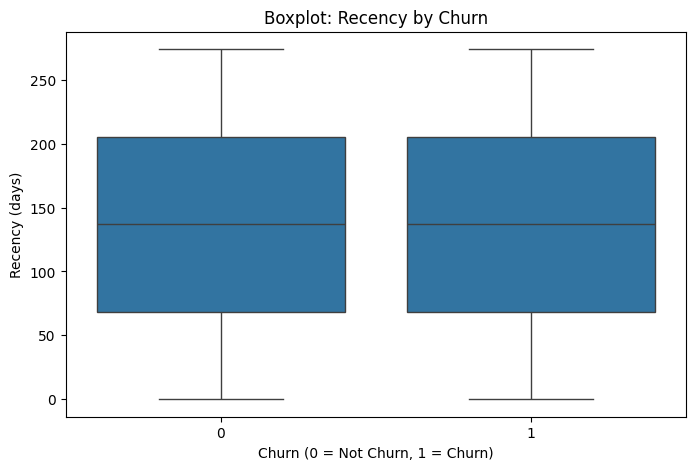

In [45]:
#see relationship between churn and recency
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Recency', data=churn_counts_recency)
plt.title("Boxplot: Recency by Churn")
plt.xlabel("Churn (0 = Not Churn, 1 = Churn)")
plt.ylabel("Recency (days)")
plt.show()

- Based on box plot chart We can see that customers churn and not churn doesn't have huge differ
- Alot of customer for both condition in range 70 until arround 210


##Churn with Frequency

In [46]:
#one row per customer
customers = data_usa.groupby('Customer_ID').agg({
    'Churn': 'first',
    'Frequency': 'first'
}).reset_index()

churn_counts_frequency = customers.groupby(['Frequency', 'Churn']).size().reset_index(name='Count')
total = churn_counts_frequency['Count'].sum()
churn_counts_frequency['Percent'] = (churn_counts_frequency['Count'] / total * 100).round(2)
churn_counts_frequency

,Frequency,Churn,Count,Percent
0,1,0,7326,15.01
1,1,1,24752,50.71
2,2,0,2790,5.72
3,2,1,9854,20.19
4,3,0,769,1.58
5,3,1,2566,5.26
6,4,0,161,0.33
7,4,1,471,0.97
8,5,0,21,0.04
9,5,1,83,0.17


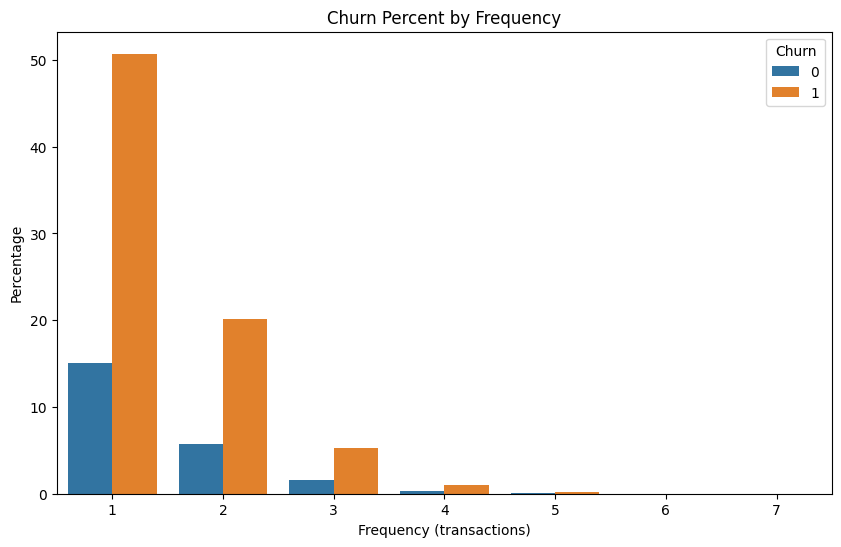

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Percent', hue='Churn', data=churn_counts_frequency)
plt.title("Churn Percent by Frequency")
plt.xlabel("Frequency (transactions)")
plt.ylabel("Percentage")
plt.show()


- Frequency as We can see righ here for the highest churn is custoemr with frequency 1, more than 50%
- Churn conditon always higher than not in every frequency

##Churn with Customer Segment

In [48]:
#one row per customer
customers = data_usa.groupby('Customer_ID').agg({
    'Churn': 'first',
    'Customer_Segment': 'first'
}).reset_index()

churn_counts_segment = customers.groupby(['Customer_Segment', 'Churn']).size().reset_index(name='Count')
total = churn_counts_segment['Count'].sum()
churn_counts_segment['Percent'] = (churn_counts_segment['Count'] / total * 100).round(2)
churn_counts_segment

,Customer_Segment,Churn,Count,Percent
0,Champions,1,52,0.11
1,Loyal Customers,0,1774,3.63
2,Loyal Customers,1,5827,11.94
3,Needs Attention,0,2172,4.45
4,Needs Attention,1,6082,12.46
5,Potential Loyalist,0,7123,14.59
6,Potential Loyalist,1,25777,52.81


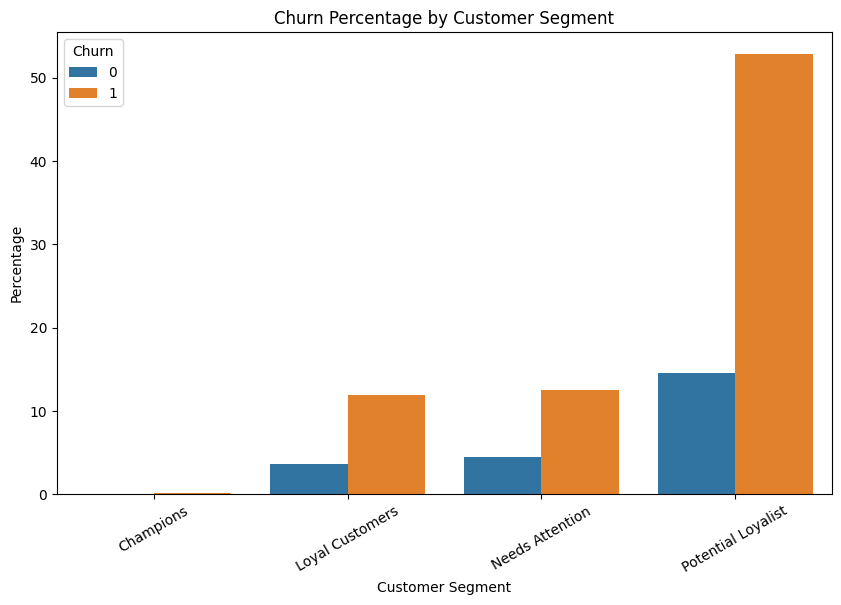

In [49]:
#chart for customer segment and churn
plt.figure(figsize=(10,6))
sns.barplot(x='Customer_Segment', y='Percent', hue='Churn', data=churn_counts_segment)
plt.title("Churn Percentage by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Percentage")
plt.xticks(rotation=30)
plt.show()

- Potential Loyalist became the most churn customers than others, more than 50%
- Need attention, and Loyal customers have similar of churn percentage

#Multicorelation

##Split for Multicorelation Check Purposed

In [50]:
#new data usa
data_usa_2 = data_usa

##VIF Score

In [51]:
  #calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

data_usa_2_col = data_usa_2[data_usa_2.select_dtypes(include = ['int64', 'float64']).columns.tolist()]
X = add_constant(data_usa_2_col)
vif_data = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_data.columns = ['feature','vif_score']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

,feature,vif_score
1,Transaction_ID,1.000229
2,Customer_ID,1.000159
3,Phone,1.000173
4,Zipcode,1.000317
5,Age,1.033040
6,Total_Purchases,4.248157
7,Amount,4.499898
8,Total_Amount,10.009858
9,Ratings,1.032673
10,Frequency,1.158533


If VIF score is high there are multicollinearity

- VIF = 1 -> No

- VIF = 4 - 10 -> Moderate

- VIF > 10 -> High

Lower VIF score its good

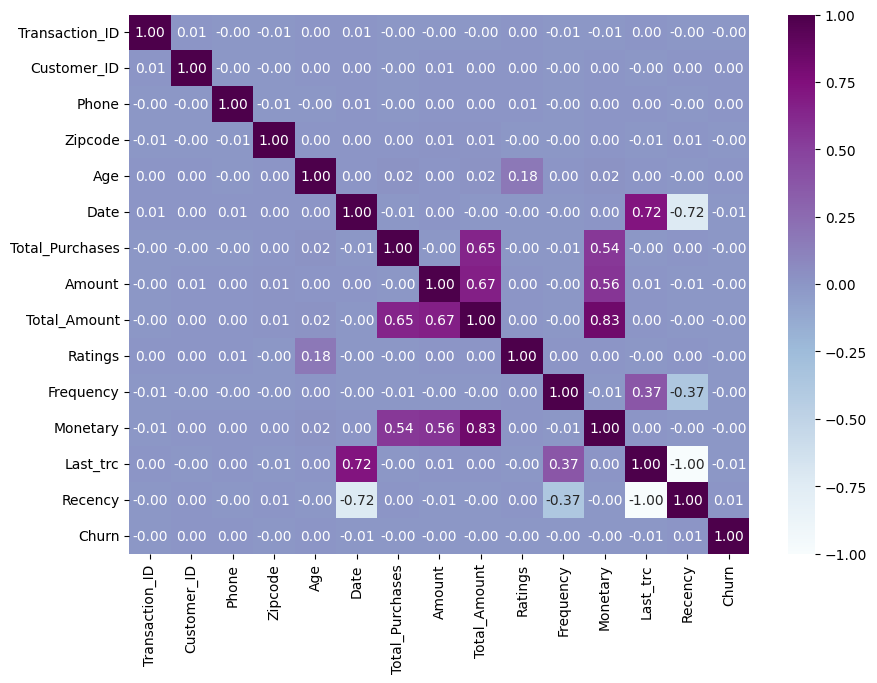

In [52]:
#heatmap correlation
data_usa_2_col = data_usa_2[data_usa_2.select_dtypes(exclude = 'object').columns.tolist()]

corr = data_usa_2_col.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BuPu')
plt.show()

As We can see from VIF Score and heat map for check multicorelation in category features:
1. Total_Amount:
- VIF Score: 10
- Heatmap:Total_Purchase, Amount, Monetary

2. Last_trc:
- Heatmap: Recency

3. Frequency:
- VIF Score: 1.1
- Heatmap: Last_trc, and Recency

4. Monetary:
- VIF Score: 3.2
- Heatmap: Total_Purchase, Amount, Total_Amount

5. Date:
- Heatmap: Last_trc, Recency, and Churn

##Creamers V

In [53]:
#drop identity features
list_col_lessuse = ['Transaction_ID','Customer_ID','Name','Phone','Zipcode','Address','Email']

for x in list_col_lessuse:
  data_usa_2 = data_usa_2.drop(x, axis = 1)

In [54]:
#list of categorical features
category_columns = data_usa_2.select_dtypes(include=['object', 'category']).columns.tolist()

In [55]:
#function for find out correlation in categorical features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

In [56]:
#show score from creamers_v
from scipy.stats import chi2_contingency

print("\n===== Cramér’s V Scores Between Categorical Columns =====")
for i in range(len(category_columns)):
    for j in range(i + 1, len(category_columns)):
        var1 = category_columns[i]
        var2 = category_columns[j]
        score = cramers_v(data_usa_2[var1], data_usa_2[var2])
        if not pd.isna(score) and score > 0.3:
            print(f"{var1} vs {var2}: {round(score, 3)}")


===== Cramér’s V Scores Between Categorical Columns =====
City vs Income: 0.452


/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))


State vs Income: 0.452


/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: Runtim

Product_Category vs Product_Brand: 0.998
Product_Category vs Product_Type: 0.999
Product_Category vs products: 0.999
Product_Brand vs Product_Type: 0.846
Product_Brand vs products: 0.813
Product_Type vs products: 0.981


As We can see right here there are few features that have correlation more than 0.3:
- Product_Category
- Product_Brand
- products
- Income

We will dropped this features

##Drop Multicorelation Features

In [57]:
#drop all multicorelation features
list_col_multi = ['Total_Amount', 'Last_trc', 'Date', 'Product_Category', 'Product_Brand', 'products', 'Income']

for x in list_col_multi:
  data_usa_2 = data_usa_2.drop(x, axis = 1)

In [58]:
#recheck VIF score
data_usa_2_col = data_usa_2[data_usa_2.select_dtypes(include = ['int64', 'float64']).columns.tolist()]
X = add_constant(data_usa_2_col)
vif_data = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_data.columns = ['feature','vif_score']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

,feature,vif_score
1,Age,1.032984
2,Total_Purchases,1.747716
3,Amount,1.797587
4,Ratings,1.032528
5,Frequency,1.158454
6,Monetary,2.539022
7,Recency,1.158499
8,Churn,1.000038


All numerical features already have low VIF Score

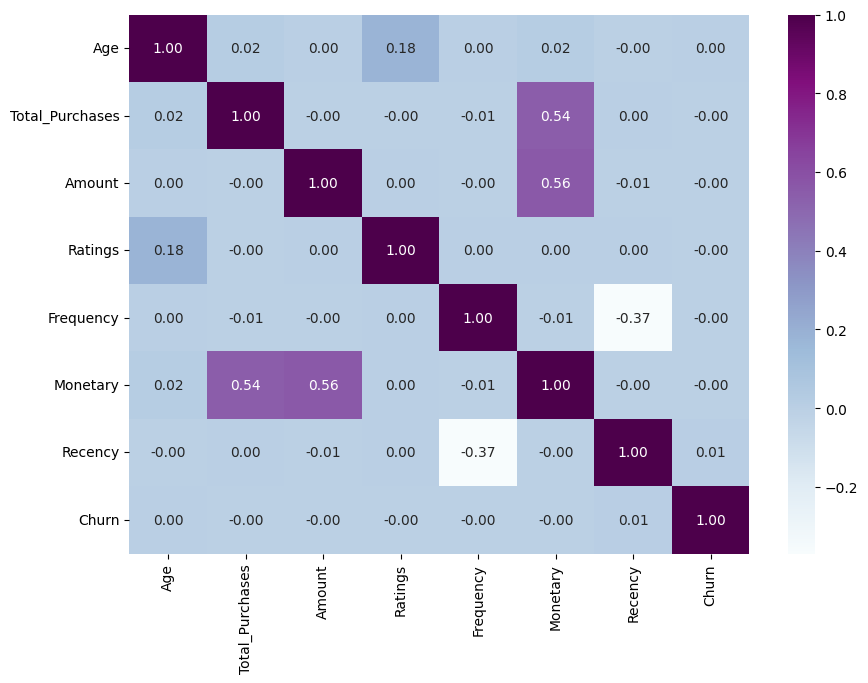

In [59]:
#recheck heatmap
data_usa_2_col = data_usa_2[data_usa_2.select_dtypes(exclude = 'object').columns.tolist()]

corr = data_usa_2_col.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BuPu')
plt.show()

In [60]:
#recheck creamersv
category_columns_new = data_usa_2.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n===== Cramér’s V Scores Between Categorical Columns =====")
for i in range(len(category_columns_new)):
    for j in range(i + 1, len(category_columns_new)):
        var1 = category_columns_new[i]
        var2 = category_columns_new[j]
        score = cramers_v(data_usa_2[var1], data_usa[var2])
        if not pd.isna(score) and score > 0.3:
            print(f"{var1} vs {var2}: {round(score, 3)}")
        else:
          print('There are no multicorelation')


===== Cramér’s V Scores Between Categorical Columns =====
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation


/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))


There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation


/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))


There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation


/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipython-input-712398427.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))


There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation


We have been handling multicorelation for numerical and categorical and we ready jump into encoding stuff

#Encoding

In [61]:
#drop all multicorelation features in data usa
list_col_multi = ['Transaction_ID', 'Total_Amount', 'Last_trc', 'Date', 'Product_Category', 'Product_Brand', 'products', 'Income']

for x in list_col_multi:
    data_usa = data_usa.drop(x, axis = 1)

We dropped features in data_usa that have multicorelation like data_usa_2, but We keep Customer_ID for grouping in the future

In [62]:
#save for pipeline
data_pipeline = data_usa

##OHe

###Gender

In [63]:
#ohe for gender
from sklearn.preprocessing import OneHotEncoder
ohe_features = ['Gender']

data_usa = pd.get_dummies(data_usa, columns=ohe_features, drop_first=True)

In [64]:
#alter data type
data_usa['Gender_Male'] = data_usa['Gender_Male'].astype(int)

We already altered Gender become new feature GenderMale with values binary

- 0 -> female

- 1 -> male

###Payment Method

In [65]:
#ohe for payment method
ohe_churn = ['Payment_Method']

data_usa = pd.get_dummies(data_usa, columns=ohe_churn, drop_first=True)

In [66]:
#alter data type
list_payment = ['Payment_Method_Credit Card', 'Payment_Method_Debit Card', 'Payment_Method_PayPal']
for x in list_payment:
  data_usa[x] = data_usa[x].astype(int)

We have been conducted OHe for payment method , and now there are 3 separeted columns fe each method:
- Payment_Method_Credit Card
- Payment_Method_Debit Card
- Payment_Method_PayPal


###7 Features

In [67]:
ohe_cols = ['Feedback', 'Shipping_Method', 'Order_Status', 'Customer_Segment', 'City', 'State', 'Product_Type']

#train set
data_usa = pd.get_dummies(data_usa, columns=ohe_cols, dtype='uint8')

We have been used OHe for 7 features:
- Feedback
- Shipping Method
- Order Status
- Customer Segment
- City
- State
- Product Type

Next We will drope uselsess features

###Drop Identity Features

In [68]:
#drop country features
data_usa = data_usa.drop(columns=['Country','Name', 'Email', 'Phone', 'Address', 'Zipcode'])

After We dropped useless features, We will jump into make formula for making sure values for features that have been encoded qwith OHe only have 1 or 0 values

###Grouping by Customer ID

In [69]:
# prefixes of columns created by get_dummies
dummy_prefixes = ['City_', 'State_', 'Product_Type_', 'Payment_Method_', 'Feedback_', 'Shipping_Method', 'Order_Status_', 'Customer_Segment_']

#build based agg rules sum
agg_rules = {c: 'sum' for c in data_usa.columns if c != 'Customer_ID'}

#numeric features
for c in ['Ratings', 'FrequencyScaled', 'Recency', 'MonetaryScaled']:
    if c in agg_rules: agg_rules[c] = 'mean'

#gender features
for c in ['Gender_Male', 'Churn']:
    if c in agg_rules: agg_rules[c] = 'first'

#dummy columns
dummy_cols = [c for c in data_usa.columns if any(c.startswith(p) for p in dummy_prefixes)]
for c in dummy_cols:
    agg_rules[c] = 'max'

data_customer = (
    data_usa
    .groupby('Customer_ID')
    .agg(agg_rules)
    .reset_index()
)

In [70]:
#recheck values doesn't match with column
list_column = data_customer.columns
for x in list_column:
  print(f'-------------------------------{x}-------------------------------')
  jumlah_value = data_customer[x].value_counts().sort_index().reset_index()
  display(jumlah_value)

-------------------------------Customer_ID-------------------------------


,Customer_ID,count
0,10000.0,1
1,10001.0,1
2,10002.0,1
3,10003.0,1
4,10004.0,1
...,...,...
48802,99994.0,1
48803,99995.0,1
48804,99997.0,1
48805,99998.0,1


-------------------------------Age-------------------------------


,Age,count
0,18.0,164
1,19.0,1596
2,20.0,3439
3,21.0,322
4,22.0,1093
...,...,...
196,227.0,1
197,240.0,1
198,248.0,1
199,253.0,1


-------------------------------Total_Purchases-------------------------------


,Total_Purchases,count
0,1.0,3393
1,2.0,3501
2,3.0,3662
3,4.0,1
4,4.0,1
...,...,...
80,37.0,5
81,38.0,1
82,39.0,1
83,40.0,1


-------------------------------Amount-------------------------------


,Amount,count
0,10.006769,1
1,10.036309,1
2,10.053606,1
3,10.056741,1
4,10.077573,1
...,...,...
48802,1920.546826,1
48803,1962.450437,1
48804,2053.029052,1
48805,2095.097476,1


-------------------------------Ratings-------------------------------


,Ratings,count
0,1.000000,5332
1,1.250000,8
2,1.333333,57
3,1.500000,893
4,1.666667,109
5,1.750000,11
6,1.833333,1
7,2.000000,8731
8,2.166667,1
9,2.200000,6


-------------------------------Frequency-------------------------------


,Frequency,count
0,1,31945
1,2,133
2,4,12525
3,6,119
4,9,3287
5,12,48
6,16,618
7,20,14
8,25,102
9,30,2


-------------------------------Monetary-------------------------------


,Monetary,count
0,10.226839,1
1,10.304530,1
2,10.358990,1
3,10.382533,1
4,10.601896,1
...,...,...
48802,12457.217032,1
48803,12686.198104,1
48804,13104.493270,1
48805,13426.567218,1


-------------------------------Recency-------------------------------


,Recency,count
0,0.0,267
1,1.0,262
2,2.0,247
3,3.0,240
4,4.0,240
...,...,...
270,270.0,114
271,271.0,112
272,272.0,110
273,273.0,94


-------------------------------Churn-------------------------------


,Churn,count
0,0,11069
1,1,37738


-------------------------------Gender_Male-------------------------------


,Gender_Male,count
0,0,17825
1,1,30982


-------------------------------Payment_Method_Credit Card-------------------------------


,Payment_Method_Credit Card,count
0,0,30853
1,1,17954


-------------------------------Payment_Method_Debit Card-------------------------------


,Payment_Method_Debit Card,count
0,0,32661
1,1,16146


-------------------------------Payment_Method_PayPal-------------------------------


,Payment_Method_PayPal,count
0,0,34756
1,1,14051


-------------------------------Feedback_Average-------------------------------


,Feedback_Average,count
0,0,34493
1,1,14314


-------------------------------Feedback_Bad-------------------------------


,Feedback_Bad,count
0,0,38359
1,1,10448


-------------------------------Feedback_Excellent-------------------------------


,Feedback_Excellent,count
0,0,31243
1,1,17564


-------------------------------Feedback_Good-------------------------------


,Feedback_Good,count
0,0,27459
1,1,21348


-------------------------------Shipping_Method_Express-------------------------------


,Shipping_Method_Express,count
0,0,27888
1,1,20919


-------------------------------Shipping_Method_Same-Day-------------------------------


,Shipping_Method_Same-Day,count
0,0,27620
1,1,21187


-------------------------------Shipping_Method_Standard-------------------------------


,Shipping_Method_Standard,count
0,0,28844
1,1,19963


-------------------------------Order_Status_Delivered-------------------------------


,Order_Status_Delivered,count
0,0,23490
1,1,25317


-------------------------------Order_Status_Pending-------------------------------


,Order_Status_Pending,count
0,0,37380
1,1,11427


-------------------------------Order_Status_Processing-------------------------------


,Order_Status_Processing,count
0,0,36268
1,1,12539


-------------------------------Order_Status_Shipped-------------------------------


,Order_Status_Shipped,count
0,0,34986
1,1,13821


-------------------------------Customer_Segment_Champions-------------------------------


,Customer_Segment_Champions,count
0,0,48755
1,1,52


-------------------------------Customer_Segment_Loyal Customers-------------------------------


,Customer_Segment_Loyal Customers,count
0,0,41206
1,1,7601


-------------------------------Customer_Segment_Needs Attention-------------------------------


,Customer_Segment_Needs Attention,count
0,0,40553
1,1,8254


-------------------------------Customer_Segment_Potential Loyalist-------------------------------


,Customer_Segment_Potential Loyalist,count
0,0,15907
1,1,32900


-------------------------------City_Albuquerque-------------------------------


,City_Albuquerque,count
0,0,48135
1,1,672


-------------------------------City_Arlington-------------------------------


,City_Arlington,count
0,0,48202
1,1,605


-------------------------------City_Atlanta-------------------------------


,City_Atlanta,count
0,0,48172
1,1,635


-------------------------------City_Austin-------------------------------


,City_Austin,count
0,0,48098
1,1,709


-------------------------------City_Baltimore-------------------------------


,City_Baltimore,count
0,0,48128
1,1,679


-------------------------------City_Boston-------------------------------


,City_Boston,count
0,0,42101
1,1,6706


-------------------------------City_Charlotte-------------------------------


,City_Charlotte,count
0,0,48163
1,1,644


-------------------------------City_Chicago-------------------------------


,City_Chicago,count
0,0,34090
1,1,14717


-------------------------------City_Cleveland-------------------------------


,City_Cleveland,count
0,0,48133
1,1,674


-------------------------------City_Colorado Springs-------------------------------


,City_Colorado Springs,count
0,0,48138
1,1,669


-------------------------------City_Columbus-------------------------------


,City_Columbus,count
0,0,48126
1,1,681


-------------------------------City_Dallas-------------------------------


,City_Dallas,count
0,0,48169
1,1,638


-------------------------------City_Denver-------------------------------


,City_Denver,count
0,0,48165
1,1,642


-------------------------------City_Detroit-------------------------------


,City_Detroit,count
0,0,48129
1,1,678


-------------------------------City_El Paso-------------------------------


,City_El Paso,count
0,0,48156
1,1,651


-------------------------------City_Fort Worth-------------------------------


,City_Fort Worth,count
0,0,45049
1,1,3758


-------------------------------City_Fresno-------------------------------


,City_Fresno,count
0,0,48125
1,1,682


-------------------------------City_Houston-------------------------------


,City_Houston,count
0,0,48122
1,1,685


-------------------------------City_Indianapolis-------------------------------


,City_Indianapolis,count
0,0,48133
1,1,674


-------------------------------City_Jacksonville-------------------------------


,City_Jacksonville,count
0,0,48129
1,1,678


-------------------------------City_Kansas City-------------------------------


,City_Kansas City,count
0,0,48161
1,1,646


-------------------------------City_Las Vegas-------------------------------


,City_Las Vegas,count
0,0,48130
1,1,677


-------------------------------City_Long Beach-------------------------------


,City_Long Beach,count
0,0,48131
1,1,676


-------------------------------City_Los Angeles-------------------------------


,City_Los Angeles,count
0,0,48117
1,1,690


-------------------------------City_Louisville-------------------------------


,City_Louisville,count
0,0,48136
1,1,671


-------------------------------City_Memphis-------------------------------


,City_Memphis,count
0,0,48115
1,1,692


-------------------------------City_Mesa-------------------------------


,City_Mesa,count
0,0,48145
1,1,662


-------------------------------City_Miami-------------------------------


,City_Miami,count
0,0,48112
1,1,695


-------------------------------City_Milwaukee-------------------------------


,City_Milwaukee,count
0,0,48161
1,1,646


-------------------------------City_Minneapolis-------------------------------


,City_Minneapolis,count
0,0,48154
1,1,653


-------------------------------City_Nashville-------------------------------


,City_Nashville,count
0,0,48157
1,1,650


-------------------------------City_New Orleans-------------------------------


,City_New Orleans,count
0,0,48133
1,1,674


-------------------------------City_New York-------------------------------


,City_New York,count
0,0,44825
1,1,3982


-------------------------------City_Oakland-------------------------------


,City_Oakland,count
0,0,48124
1,1,683


-------------------------------City_Oklahoma City-------------------------------


,City_Oklahoma City,count
0,0,48163
1,1,644


-------------------------------City_Omaha-------------------------------


,City_Omaha,count
0,0,48177
1,1,630


-------------------------------City_Philadelphia-------------------------------


,City_Philadelphia,count
0,0,48206
1,1,601


-------------------------------City_Phoenix-------------------------------


,City_Phoenix,count
0,0,48133
1,1,674


-------------------------------City_Portland-------------------------------


,City_Portland,count
0,0,48153
1,1,654


-------------------------------City_Raleigh-------------------------------


,City_Raleigh,count
0,0,48140
1,1,667


-------------------------------City_Sacramento-------------------------------


,City_Sacramento,count
0,0,48162
1,1,645


-------------------------------City_San Antonio-------------------------------


,City_San Antonio,count
0,0,48108
1,1,699


-------------------------------City_San Diego-------------------------------


,City_San Diego,count
0,0,48180
1,1,627


-------------------------------City_San Francisco-------------------------------


,City_San Francisco,count
0,0,40244
1,1,8563


-------------------------------City_San Jose-------------------------------


,City_San Jose,count
0,0,48139
1,1,668


-------------------------------City_Seattle-------------------------------


,City_Seattle,count
0,0,48157
1,1,650


-------------------------------City_Tucson-------------------------------


,City_Tucson,count
0,0,48167
1,1,640


-------------------------------City_Tulsa-------------------------------


,City_Tulsa,count
0,0,48161
1,1,646


-------------------------------City_Virginia Beach-------------------------------


,City_Virginia Beach,count
0,0,48113
1,1,694


-------------------------------City_Washington-------------------------------


,City_Washington,count
0,0,48169
1,1,638


-------------------------------City_Wichita-------------------------------


,City_Wichita,count
0,0,48159
1,1,648


-------------------------------State_Alabama-------------------------------


,State_Alabama,count
0,0,48128
1,1,679


-------------------------------State_Alaska-------------------------------


,State_Alaska,count
0,0,48161
1,1,646


-------------------------------State_Arizona-------------------------------


,State_Arizona,count
0,0,48180
1,1,627


-------------------------------State_Arkansas-------------------------------


,State_Arkansas,count
0,0,48154
1,1,653


-------------------------------State_California-------------------------------


,State_California,count
0,0,48102
1,1,705


-------------------------------State_Colorado-------------------------------


,State_Colorado,count
0,0,48178
1,1,629


-------------------------------State_Connecticut-------------------------------


,State_Connecticut,count
0,0,34086
1,1,14721


-------------------------------State_Delaware-------------------------------


,State_Delaware,count
0,0,48137
1,1,670


-------------------------------State_Florida-------------------------------


,State_Florida,count
0,0,48132
1,1,675


-------------------------------State_Georgia-------------------------------


,State_Georgia,count
0,0,42051
1,1,6756


-------------------------------State_Hawaii-------------------------------


,State_Hawaii,count
0,0,48138
1,1,669


-------------------------------State_Idaho-------------------------------


,State_Idaho,count
0,0,48162
1,1,645


-------------------------------State_Illinois-------------------------------


,State_Illinois,count
0,0,48134
1,1,673


-------------------------------State_Indiana-------------------------------


,State_Indiana,count
0,0,48157
1,1,650


-------------------------------State_Iowa-------------------------------


,State_Iowa,count
0,0,48096
1,1,711


-------------------------------State_Kansas-------------------------------


,State_Kansas,count
0,0,44806
1,1,4001


-------------------------------State_Kentucky-------------------------------


,State_Kentucky,count
0,0,48130
1,1,677


-------------------------------State_Louisiana-------------------------------


,State_Louisiana,count
0,0,48115
1,1,692


-------------------------------State_Maine-------------------------------


,State_Maine,count
0,0,40204
1,1,8603


-------------------------------State_Maryland-------------------------------


,State_Maryland,count
0,0,48072
1,1,735


-------------------------------State_Massachusetts-------------------------------


,State_Massachusetts,count
0,0,48138
1,1,669


-------------------------------State_Michigan-------------------------------


,State_Michigan,count
0,0,48124
1,1,683


-------------------------------State_Minnesota-------------------------------


,State_Minnesota,count
0,0,48092
1,1,715


-------------------------------State_Mississippi-------------------------------


,State_Mississippi,count
0,0,48111
1,1,696


-------------------------------State_Missouri-------------------------------


,State_Missouri,count
0,0,48154
1,1,653


-------------------------------State_Montana-------------------------------


,State_Montana,count
0,0,48138
1,1,669


-------------------------------State_Nebraska-------------------------------


,State_Nebraska,count
0,0,48161
1,1,646


-------------------------------State_Nevada-------------------------------


,State_Nevada,count
0,0,48121
1,1,686


-------------------------------State_New Hampshire-------------------------------


,State_New Hampshire,count
0,0,48127
1,1,680


-------------------------------State_New Jersey-------------------------------


,State_New Jersey,count
0,0,48118
1,1,689


-------------------------------State_New Mexico-------------------------------


,State_New Mexico,count
0,0,45045
1,1,3762


-------------------------------State_New York-------------------------------


,State_New York,count
0,0,48098
1,1,709


-------------------------------State_North Carolina-------------------------------


,State_North Carolina,count
0,0,48146
1,1,661


-------------------------------State_North Dakota-------------------------------


,State_North Dakota,count
0,0,48167
1,1,640


-------------------------------State_Ohio-------------------------------


,State_Ohio,count
0,0,48095
1,1,712


-------------------------------State_Oklahoma-------------------------------


,State_Oklahoma,count
0,0,48192
1,1,615


-------------------------------State_Oregon-------------------------------


,State_Oregon,count
0,0,48163
1,1,644


-------------------------------State_Pennsylvania-------------------------------


,State_Pennsylvania,count
0,0,48118
1,1,689


-------------------------------State_Rhode Island-------------------------------


,State_Rhode Island,count
0,0,48164
1,1,643


-------------------------------State_South Carolina-------------------------------


,State_South Carolina,count
0,0,48097
1,1,710


-------------------------------State_South Dakota-------------------------------


,State_South Dakota,count
0,0,48151
1,1,656


-------------------------------State_Tennessee-------------------------------


,State_Tennessee,count
0,0,48148
1,1,659


-------------------------------State_Texas-------------------------------


,State_Texas,count
0,0,48092
1,1,715


-------------------------------State_Utah-------------------------------


,State_Utah,count
0,0,48118
1,1,689


-------------------------------State_Vermont-------------------------------


,State_Vermont,count
0,0,48179
1,1,628


-------------------------------State_Virginia-------------------------------


,State_Virginia,count
0,0,48116
1,1,691


-------------------------------State_Washington-------------------------------


,State_Washington,count
0,0,48171
1,1,636


-------------------------------State_West Virginia-------------------------------


,State_West Virginia,count
0,0,48104
1,1,703


-------------------------------State_Wisconsin-------------------------------


,State_Wisconsin,count
0,0,48137
1,1,670


-------------------------------State_Wyoming-------------------------------


,State_Wyoming,count
0,0,48126
1,1,681


-------------------------------Product_Type_Bathroom-------------------------------


,Product_Type_Bathroom,count
0,0,47488
1,1,1319


-------------------------------Product_Type_Bedding-------------------------------


,Product_Type_Bedding,count
0,0,47488
1,1,1319


-------------------------------Product_Type_BlueStar AC-------------------------------


,Product_Type_BlueStar AC,count
0,0,48477
1,1,330


-------------------------------Product_Type_Children's-------------------------------


,Product_Type_Children's,count
0,0,47397
1,1,1410


-------------------------------Product_Type_Chocolate-------------------------------


,Product_Type_Chocolate,count
0,0,47469
1,1,1338


-------------------------------Product_Type_Coffee-------------------------------


,Product_Type_Coffee,count
0,0,47405
1,1,1402


-------------------------------Product_Type_Decorations-------------------------------


,Product_Type_Decorations,count
0,0,46240
1,1,2567


-------------------------------Product_Type_Dress-------------------------------


,Product_Type_Dress,count
0,0,47482
1,1,1325


-------------------------------Product_Type_Fiction-------------------------------


,Product_Type_Fiction,count
0,0,44940
1,1,3867


-------------------------------Product_Type_Fridge-------------------------------


,Product_Type_Fridge,count
0,0,47292
1,1,1515


-------------------------------Product_Type_Furniture-------------------------------


,Product_Type_Furniture,count
0,0,46202
1,1,2605


-------------------------------Product_Type_Headphones-------------------------------


,Product_Type_Headphones,count
0,0,47431
1,1,1376


-------------------------------Product_Type_Jacket-------------------------------


,Product_Type_Jacket,count
0,0,47553
1,1,1254


-------------------------------Product_Type_Jeans-------------------------------


,Product_Type_Jeans,count
0,0,47448
1,1,1359


-------------------------------Product_Type_Juice-------------------------------


,Product_Type_Juice,count
0,0,46067
1,1,2740


-------------------------------Product_Type_Kitchen-------------------------------


,Product_Type_Kitchen,count
0,0,47441
1,1,1366


-------------------------------Product_Type_Laptop-------------------------------


,Product_Type_Laptop,count
0,0,47527
1,1,1280


-------------------------------Product_Type_Lighting-------------------------------


,Product_Type_Lighting,count
0,0,47493
1,1,1314


-------------------------------Product_Type_Literature-------------------------------


,Product_Type_Literature,count
0,0,47497
1,1,1310


-------------------------------Product_Type_Mitsubishi 1.5 Ton 3 Star Split AC-------------------------------


,Product_Type_Mitsubishi 1.5 Ton 3 Star Split AC,count
0,0,47828
1,1,979


-------------------------------Product_Type_Non-Fiction-------------------------------


,Product_Type_Non-Fiction,count
0,0,44840
1,1,3967


-------------------------------Product_Type_Shirt-------------------------------


,Product_Type_Shirt,count
0,0,47418
1,1,1389


-------------------------------Product_Type_Shoes-------------------------------


,Product_Type_Shoes,count
0,0,46184
1,1,2623


-------------------------------Product_Type_Shorts-------------------------------


,Product_Type_Shorts,count
0,0,47463
1,1,1344


-------------------------------Product_Type_Smartphone-------------------------------


,Product_Type_Smartphone,count
0,0,44927
1,1,3880


-------------------------------Product_Type_Snacks-------------------------------


,Product_Type_Snacks,count
0,0,47521
1,1,1286


-------------------------------Product_Type_Soft Drink-------------------------------


,Product_Type_Soft Drink,count
0,0,46208
1,1,2599


-------------------------------Product_Type_T-shirt-------------------------------


,Product_Type_T-shirt,count
0,0,46172
1,1,2635


-------------------------------Product_Type_Tablet-------------------------------


,Product_Type_Tablet,count
0,0,46157
1,1,2650


-------------------------------Product_Type_Television-------------------------------


,Product_Type_Television,count
0,0,46070
1,1,2737


-------------------------------Product_Type_Thriller-------------------------------


,Product_Type_Thriller,count
0,0,47374
1,1,1433


-------------------------------Product_Type_Tools-------------------------------


,Product_Type_Tools,count
0,0,47467
1,1,1340


-------------------------------Product_Type_Water-------------------------------


,Product_Type_Water,count
0,0,39411
1,1,9396


As We can see there are no another values for feartures that we've been OHe except 1, and 0

##Scaling

###Scalling the rest features

In [71]:
#scaling all features
from sklearn.preprocessing import MinMaxScaler

numeric_columns_new = ['Age', 'Total_Purchases', 'Amount', 'Frequency', 'Monetary']
units = {'Age': 1,
         'Total_Purchases': 1,
         'Amount': 1,
         'Frequency': 1,
         'Monetary': 1
}

mins = []
maxs = []
changes = []
for column in numeric_columns_new:
  scaler = MinMaxScaler()
  data_customer[column + 'Scaled'] = scaler.fit_transform(data_customer[[column]])


  mins.append(scaler.data_min_[0])
  maxs.append(scaler.data_max_[0])
  changes.append(scaler.scale_[0] * units[column])

data_customer = data_customer.drop(columns=numeric_columns_new)



pd.DataFrame({
  'column': numeric_columns_new,
  'unit': [units[c] for c in numeric_columns_new],
  'change': changes,
  'min': mins,
  'max': maxs,
})

,column,unit,change,min,max
0,Age,1,0.003846,18.000000,278.000000
1,Total_Purchases,1,0.025000,1.000000,41.000000
2,Amount,1,0.000435,10.006769,2311.323060
3,Frequency,1,0.020833,1.000000,49.000000
4,Monetary,1,0.000073,10.226839,13712.012904


#Train, Test, and Validation split data

In [72]:
#split the data
from sklearn.model_selection import train_test_split

X = data_customer.drop(columns='Churn')
y = data_customer[['Churn']]

#splitting: train and test
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
X_data_train = X_data_train.drop(columns='Customer_ID')
X_data_test = X_data_test.drop(columns='Customer_ID')

In [74]:
X_data_train.sample(3)

,Ratings,Recency,Gender_Male,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Feedback_Average,Feedback_Bad,Feedback_Excellent,Feedback_Good,Shipping_Method_Express,Shipping_Method_Same-Day,Shipping_Method_Standard,Order_Status_Delivered,Order_Status_Pending,Order_Status_Processing,Order_Status_Shipped,Customer_Segment_Champions,Customer_Segment_Loyal Customers,Customer_Segment_Needs Attention,Customer_Segment_Potential Loyalist,City_Albuquerque,City_Arlington,City_Atlanta,City_Austin,City_Baltimore,City_Boston,City_Charlotte,City_Chicago,City_Cleveland,City_Colorado Springs,City_Columbus,City_Dallas,City_Denver,City_Detroit,City_El Paso,City_Fort Worth,City_Fresno,City_Houston,City_Indianapolis,City_Jacksonville,City_Kansas City,City_Las Vegas,City_Long Beach,City_Los Angeles,City_Louisville,City_Memphis,City_Mesa,City_Miami,City_Milwaukee,City_Minneapolis,City_Nashville,City_New Orleans,City_New York,City_Oakland,City_Oklahoma City,City_Omaha,City_Philadelphia,City_Phoenix,City_Portland,City_Raleigh,City_Sacramento,City_San Antonio,City_San Diego,City_San Francisco,City_San Jose,City_Seattle,City_Tucson,City_Tulsa,City_Virginia Beach,City_Washington,City_Wichita,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Product_Type_Bathroom,Product_Type_Bedding,Product_Type_BlueStar AC,Product_Type_Children's,Product_Type_Chocolate,Product_Type_Coffee,Product_Type_Decorations,Product_Type_Dress,Product_Type_Fiction,Product_Type_Fridge,Product_Type_Furniture,Product_Type_Headphones,Product_Type_Jacket,Product_Type_Jeans,Product_Type_Juice,Product_Type_Kitchen,Product_Type_Laptop,Product_Type_Lighting,Product_Type_Literature,Product_Type_Mitsubishi 1.5 Ton 3 Star Split AC,Product_Type_Non-Fiction,Product_Type_Shirt,Product_Type_Shoes,Product_Type_Shorts,Product_Type_Smartphone,Product_Type_Snacks,Product_Type_Soft Drink,Product_Type_T-shirt,Product_Type_Tablet,Product_Type_Television,Product_Type_Thriller,Product_Type_Tools,Product_Type_Water,AgeScaled,Total_PurchasesScaled,AmountScaled,FrequencyScaled,MonetaryScaled
47516,1.0,69.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.019231,0.050,0.070223,0.0,0.036828
15271,1.0,186.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.019231,0.075,0.115021,0.0,0.079449
9981,4.0,89.0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.007692,0.075,0.011770,0.0,0.010083


#Handle Imbalance

In [75]:
#evidence data imbalance
churn_value = y_data_train.value_counts().reset_index()
total_churn = len(y_data_train)
churn_value['percentage'] = (churn_value['count'] / total_churn) * 100
churn_value

,Churn,count,percentage
0,1,30199,77.34409
1,0,8846,22.65591


- We can see how ditribution of data churn, and not churn it's not balance, so We will handle imbalance with SMOTE

In [76]:
from imblearn.over_sampling import SMOTE

#balancing dataset
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X_data_train, y_data_train)

In [77]:
#recheck data
print(f'Data X Before balancing: {len(X_data_train)}')
print(f'Data X After balancing: {len(X_smote)}')
print(f'Data y Before balancing: {len(y_data_train)}')
print(f'data y After balancing: {len(y_smote)}')

Data X Before balancing: 39045
Data X After balancing: 60398
Data y Before balancing: 39045
data y After balancing: 60398


- Data have been balancing with SMOTE

In [78]:
#make data train into numpy
X_smote_numpy = X_smote.to_numpy()
y_smote_numpy = y_smote.to_numpy()

As We can see righ here, We already have final data that we can use for modeling

#Model before Tunning

## kNN

###Training

In [79]:
#train kNN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

model_kNN = KNeighborsClassifier(n_neighbors = 4)
model_kNN.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

###Model Evaluation

####Training

In [80]:
#evaluate validation
y_train_pred = model_kNN.predict(X_data_train)
print(classification_report(y_data_train, y_train_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.30      0.99      0.46      8846
           1       0.99      0.32      0.49     30199

    accuracy                           0.47     39045
   macro avg       0.65      0.66      0.47     39045
weighted avg       0.84      0.47      0.48     39045



As we can see here for data validation with kNN:
- Precision score: 0.99 (99%). This model can predict 99% of customers churn correctly

- Recall score: 0.32 (32%). Our model can caught arround 32% of customers churn

####Testing

In [81]:
#evaluate testing
y_testing_pred = model_kNN.predict(X_data_test)
print(classification_report(y_data_test, y_testing_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.23      0.82      0.36      2223
           1       0.80      0.20      0.32      7539

    accuracy                           0.34      9762
   macro avg       0.51      0.51      0.34      9762
weighted avg       0.67      0.34      0.33      9762



We can see here for data test with kNN:
- Precision score: 0.80 (80%). This model can predict 80% of customers churn correctly

- Recall score: 0.20 (20%). Our model can caught arround 20% of customers churn

##Random Forest

###Training

In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
  n_estimators = 100,
  max_depth = 5,
  random_state = 11,
)

model.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, random_state=11)

###Evaluation

####Training

In [83]:
#evaluation validation
y_train_pred = model.predict(X_data_train)
print(classification_report(y_data_train, y_train_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.24      0.38      0.30      8846
           1       0.78      0.65      0.71     30199

    accuracy                           0.59     39045
   macro avg       0.51      0.52      0.50     39045
weighted avg       0.66      0.59      0.62     39045



We can see here for data validation with Random Forest:
- Precision score: 0.78 (78%). This model can predict 78% of customers churn correctly

- Recall score: 0.65 (65%). Our model can caught arround 65% of customers churn

####Testing

In [84]:
#evaluatiin testing
y_testing_pred = model.predict(X_data_test)
print(classification_report(y_data_test, y_testing_pred))

              precision    recall  f1-score   support

           0       0.25      0.38      0.30      2223
           1       0.78      0.65      0.71      7539

    accuracy                           0.59      9762
   macro avg       0.51      0.52      0.51      9762
weighted avg       0.66      0.59      0.62      9762



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


As we can see here for data test with Random Forest:
- Precision score: 0.78 (78%). This model can predict 78% of customers churn correctly

- Recall score: 0.65 (65%). Our model can caught arround 65% of customers churn

##Logistic Regression

###Training

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
  penalty = 'l2',
  C = 10,
  solver = 'liblinear',
  random_state = 11,
)

model.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, random_state=11, solver='liblinear')

###Evaluation

####Training

In [86]:
#evaluation validation
y_train_pred = model.predict(X_data_train)
print(classification_report(y_data_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.23      0.03      0.06      8846
           1       0.77      0.97      0.86     30199

    accuracy                           0.76     39045
   macro avg       0.50      0.50      0.46     39045
weighted avg       0.65      0.76      0.68     39045



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


As we can see here for data validation with Logistic Regression:
- Precision score: 0.77 (77%). This model can predict 77% of customers churn correctly

- Recall score: 0.97 (97%). Our model can caught arround 97% of customers churn

####Testing

In [87]:
#evaluation testing
y_testing_pred = model.predict(X_data_test)
print(classification_report(y_data_test, y_testing_pred))

              precision    recall  f1-score   support

           0       0.26      0.03      0.06      2223
           1       0.77      0.97      0.86      7539

    accuracy                           0.76      9762
   macro avg       0.51      0.50      0.46      9762
weighted avg       0.66      0.76      0.68      9762



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


As we can see here for data test with Logistic Regression:
- Precision score: 0.77 (77%). This model can predict 77% of customers churn correctly

- Recall score: 0.97 (97%). Our model can caught arround 97% of customers churn

##XGBoost

In [88]:
from xgboost import XGBClassifier

model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8
)

model.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:30:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

###Evaluation

####Training

In [89]:
#evaluation validation
y_train_pred = model.predict(X_data_train)
print(classification_report(y_data_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.23      0.18      0.20      8846
           1       0.77      0.82      0.80     30199

    accuracy                           0.68     39045
   macro avg       0.50      0.50      0.50     39045
weighted avg       0.65      0.68      0.66     39045



We can see here for data validation with Random Forest:
- Precision score: 0.77 (77%). This model can predict 77% of customers churn correctly

- Recall score: 0.82 (82%). Our model can caught arround 82% of customers churn

####Testing

In [90]:
#evaluatiin testing
y_testing_pred = model.predict(X_data_test)
print(classification_report(y_data_test, y_testing_pred))

              precision    recall  f1-score   support

           0       0.23      0.19      0.21      2223
           1       0.77      0.82      0.79      7539

    accuracy                           0.67      9762
   macro avg       0.50      0.50      0.50      9762
weighted avg       0.65      0.67      0.66      9762



As we can see here for data test with Random Forest:
- Precision score: 0.77 (77%). This model can predict 77% of customers churn correctly

- Recall score: 0.82 (82%). Our model can caught arround 82% of customers churn

#Model Orign Comparasion

In [91]:
#compare recall value for each model
model_orign = [
    ["kNN", "Train", 0.99, 0.32],
    ["kNN", "Test", 0.80, 0.20],
    ["Random Forest", "Train", 0.78, 0.65],
    ["Random Forest", "Test", 0.78, 0.65],
    ["Logistic Regression", "Train", 0.77, 0.97],
    ["Logistic Regression", "Test", 0.77, 0.97],
    ["XGBoost", "Train", 0.77, 0.82],
    ["XGBoost", "Test", 0.77, 0.82]
]

columns = ["Model", "Dataset", "Precision", "Recall (1)"]

model_comparison = pd.DataFrame(model_orign, columns=columns)

model_comparison

,Model,Dataset,Precision,Recall (1)
0,kNN,Train,0.99,0.32
1,kNN,Test,0.80,0.20
2,Random Forest,Train,0.78,0.65
3,Random Forest,Test,0.78,0.65
4,Logistic Regression,Train,0.77,0.97
5,Logistic Regression,Test,0.77,0.97
6,XGBoost,Train,0.77,0.82
7,XGBoost,Test,0.77,0.82


- Logistic Regression have the best recall value than others model, with 0.97, which is can grasp 97% churn of customers

#Model with Tunning

##kNN

###Training with tunning

In [92]:
#define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [93]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

- We havenn trained data train with kNN that tunned with GridSearch

In [94]:
#the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.201629,4
1,{'n_neighbors': 3},0.306070,1
2,{'n_neighbors': 4},0.184211,5
3,{'n_neighbors': 5},0.253783,2
4,{'n_neighbors': 6},0.166396,6
5,{'n_neighbors': 7},0.219809,3
6,{'n_neighbors': 8},0.151230,7


- Based on table above We can see that parameters 3 is the best from all of them

###Evaluation

####Training

In [95]:
#classification report
from sklearn.metrics import classification_report

y_pred = knn_clf_gridcv.best_estimator_.predict(X_data_train)
print(classification_report(y_data_train, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.38      0.98      0.55      8846
           1       0.99      0.54      0.70     30199

    accuracy                           0.64     39045
   macro avg       0.69      0.76      0.63     39045
weighted avg       0.85      0.64      0.67     39045



As we can see here for data Training with kNN use GridSearch:

- Precision score: 0.99 (99%). This model can predict 99% of customers churn correctly

- Recall score: 0.54 (54%). Our model can caught arround 54% of customers churn

####Testing

In [96]:
#classification report
from sklearn.metrics import classification_report

y_test_pred = knn_clf_gridcv.best_estimator_.predict(X_data_test)
print(classification_report(y_data_test, y_test_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.24      0.72      0.36      2223
           1       0.79      0.32      0.46      7539

    accuracy                           0.41      9762
   macro avg       0.52      0.52      0.41      9762
weighted avg       0.67      0.41      0.43      9762



As we can see here for data test with kNN use GridSearch:

- Precision score: 0.79 (79%). This model can predict 79% of customers churn correctly

- Recall score: 0.32 (32%). Our model can caught arround 32% of customers churn

##Random Forest

###Training with tunning

In [97]:
#define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [98]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

- We already ran data train with Random Forest plus tunned with GridSearch

In [99]:
#the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
22,"{'max_depth': 5, 'n_estimators': 30}",0.665254,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.659625,2
20,"{'max_depth': 5, 'n_estimators': 10}",0.658632,3
24,"{'max_depth': 5, 'n_estimators': 50}",0.653830,4
23,"{'max_depth': 5, 'n_estimators': 40}",0.652638,5
17,"{'max_depth': 4, 'n_estimators': 30}",0.632935,6
16,"{'max_depth': 4, 'n_estimators': 20}",0.624889,7
15,"{'max_depth': 4, 'n_estimators': 10}",0.617967,8
19,"{'max_depth': 4, 'n_estimators': 50}",0.615319,9
18,"{'max_depth': 4, 'n_estimators': 40}",0.612438,10


- Based on table above, We can draw conclude the best max depth is 5, and estimators is 50

###Evaluation

####Training

In [100]:
#classification report
from sklearn.metrics import classification_report

y_pred = rf_clf_gridcv.best_estimator_.predict(X_data_train)
print(classification_report(y_data_train, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.38      0.30      8846
           1       0.78      0.65      0.71     30199

    accuracy                           0.59     39045
   macro avg       0.51      0.52      0.50     39045
weighted avg       0.66      0.59      0.62     39045



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


As we can see here for data validation with Random Forest use GridSearch:

- Precision score: 0.78 (78%). This model can predict 78% of customers churn correctly

- Recall score: 0.65 (65%). Our model can caught arround 65% of customers churn

####Testing

In [101]:
#classification report
from sklearn.metrics import classification_report

y_pred = rf_clf_gridcv.best_estimator_.predict(X_data_test)
print(classification_report(y_data_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.38      0.30      2223
           1       0.78      0.65      0.71      7539

    accuracy                           0.59      9762
   macro avg       0.51      0.52      0.50      9762
weighted avg       0.66      0.59      0.62      9762



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


As we can see here for data test with Random Forest use GridSearch:

- Precision score: 0.78 (78%). This model can predict 78% of customers churn correctly

- Recall score: 0.65 (65%). Our model can caught arround 65% of customers churn

##Logistic Regression

###Training with tunning

In [102]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42)

parameters = {
  'penalty' : ['l1', 'l2'],
  'C' : [0.01, 0.1, 1, 10],
  'solver' : ['liblinear'],
}

lr_clf_gridcv = GridSearchCV(lr_clf, parameters, cv=5, scoring='recall')
lr_clf_gridcv.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='recall')

- Data train have been trined with Logistic regressioin plus GridSearch

In [103]:
#the results
cv_result = pd.DataFrame(lr_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.967416,1
6,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.967184,2
7,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.966787,3
2,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.966555,4
5,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.964833,5
3,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.947647,6
1,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.885889,7
0,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.837377,8


Based on table above, We can see that the best parameter:
- C = 1

- penalty = l1

###Evaluation

####Training

In [104]:
#classification report
from sklearn.metrics import classification_report

y_pred = lr_clf_gridcv.best_estimator_.predict(X_data_train)
print(classification_report(y_data_train, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.03      0.05      8846
           1       0.77      0.97      0.86     30199

    accuracy                           0.76     39045
   macro avg       0.50      0.50      0.46     39045
weighted avg       0.65      0.76      0.68     39045



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


As we can see here for data validation with Random Forest use GridSearch:

- Precision score: 0.77 (77%). This model can predict 77% of customers churn correctly

- Recall score: 0.97 (97%). Our model can caught arround 97% of customers churn

####Testing

In [105]:
#classification report
from sklearn.metrics import classification_report

y_pred = lr_clf_gridcv.best_estimator_.predict(X_data_test)
print(classification_report(y_data_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.03      0.06      2223
           1       0.77      0.97      0.86      7539

    accuracy                           0.76      9762
   macro avg       0.51      0.50      0.46      9762
weighted avg       0.65      0.76      0.68      9762



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


As we can see here for data validation with Random Forest use GridSearch:

- Precision score: 0.77 (77%). This model can predict 77% of customers churn correctly

- Recall score: 0.97 (97%). Our model can caught arround 97% of customers churn

##XGBoost

###Training with tunning

In [106]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

parameters = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_gridcv = GridSearchCV(xgb_clf,param_grid=parameters,cv=5,scoring='recall',n_jobs=-1,verbose=1)
xgb_gridcv.fit(X_smote_numpy, y_smote_numpy)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:53:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='recall', verbose=1)

- Data train have been trined with Logistic regressioin plus GridSearch

In [107]:
#the results
cv_result = pd.DataFrame(xgb_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.986622,1
19,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.986523,2
22,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.986191,3
18,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.985728,4
29,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.984966,5
23,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.984768,6
21,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.984668,7
28,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.983675,8
31,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.983112,9
27,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.982516,10


Based on table above, We can see that the best parameter:
- learning_rate = 0.1

- max_depth = 5

- n_estimators = 200

###Evaluation

####Training

In [108]:
#classification report
from sklearn.metrics import classification_report

y_pred = xgb_gridcv.best_estimator_.predict(X_data_train)
print(classification_report(y_data_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.32      0.48      8846
           1       0.83      0.99      0.91     30199

    accuracy                           0.84     39045
   macro avg       0.89      0.66      0.69     39045
weighted avg       0.86      0.84      0.81     39045



As we can see here for data validation with Random Forest use GridSearch:

- Precision score: 0.83 (83%). This model can predict 83% of customers churn correctly

- Recall score: 0.99 (99%). Our model can caught arround 99% of customers churn

####Testing

In [109]:
#classification report
from sklearn.metrics import classification_report

y_pred = xgb_gridcv.best_estimator_.predict(X_data_test)
print(classification_report(y_data_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.27      0.41      2223
           1       0.82      0.99      0.90      7539

    accuracy                           0.82      9762
   macro avg       0.85      0.63      0.65      9762
weighted avg       0.83      0.82      0.79      9762



As we can see here for data validation with Random Forest use GridSearch:

- Precision score: 0.82 (82%). This model can predict 82% of customers churn correctly

- Recall score: 0.99 (99%). Our model can caught arround 99% of customers churn

##SHAP of XGBoost

In [113]:
#shap for XGBoost
import shap
model = xgb_gridcv.best_estimator_

explainer = shap.TreeExplainer(
 model,
 X_smote_numpy,
 feature_perturbation='interventional',
 model_output='probability',
)
explanation = explainer(X_smote_numpy)
shap_values = explainer.shap_values(X_smote_numpy)

100%|===================| 60254/60398 [05:41<00:00]       

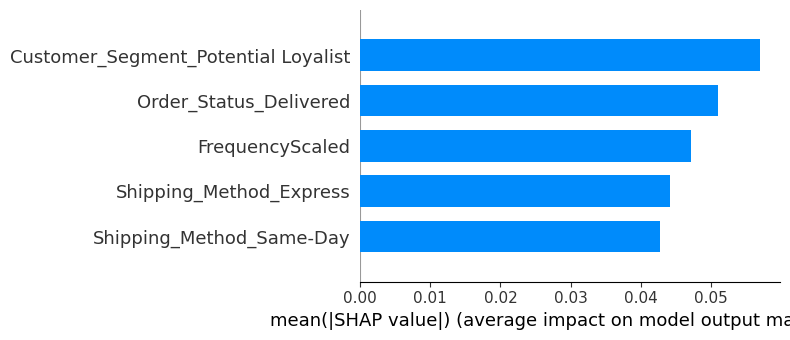

In [114]:
#chart features in XGBoost
shap.summary_plot(shap_values, X_smote_numpy, feature_names = X_smote.columns, plot_type='bar', max_display=5)

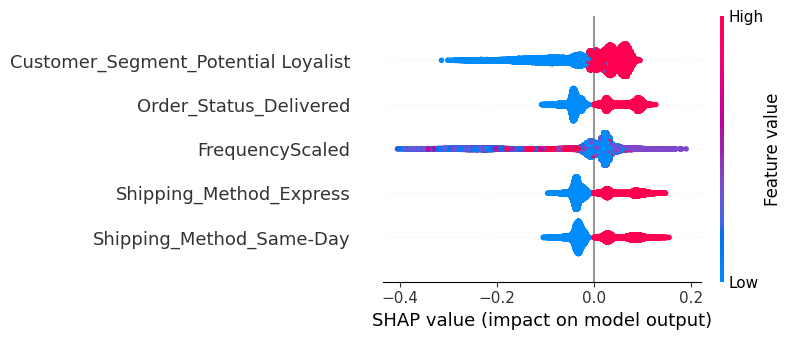

In [115]:
#beeswarm chart XGBoost
shap.summary_plot(shap_values, X_smote_numpy, feature_names = X_smote.columns, max_display=5)

Based on SHAP method for XGBoost We can see that there are few features were hve hugfe effected towards customers churn:
- Order Status Delivered: This feature shows that customers who had their last order marked as Delivered are more likely to churn (red dots on the positive side). Meanwhile, customers without “Delivered” status (blue dots) are less likely to churn.

- Customer Segment Potential Loyalist: Red dots (Potential Loyalist = 1) → cluster on the positive side → being in this segment increases churn risk.
Blue dots (Not in Potential Loyalist) → cluster on the negative side → these customers are more stable.

- Frequency: Blue dots (low frequency) on the positive side, customers with fewer visits are more likely to churn.
Red dots (high frequency) mostly on the negative side, frequent visitors tend to stay, reducing churn.

- Shipping Method Express, and Sameday: Express Shipping (red = used) on the positive side, customers who chose express are at higher churn risk.
Sameday Shipping (red = used) also on the positive side, same effect.

#Model Tunning Comparasion

In [116]:
model_tunning = [
    ["kNN", "GridSearch", "Train", 0.99,  0.54],
    ["kNN", "GridSearch", "Test", 0.79,  0.32],
    ["Random Forest", "GridSearch", "Train", 0.78, 0.65],
    ["Random Forest", "GridSearch", "Test", 0.78, 0.65],
    ["Logistic Regression", "GridSearch", "Train", 0.77, 0.97],
    ["Logistic Regression", "GridSearch", "Test", 0.77, 0.97],
    ["XGBoost", "GridSearch", "Train", 0.83, 0.99],
    ["XGBoost", "GridSearch", "Test", 0.82, 0.99]
]

columns = ["Model", "Hyperparameter", "Dataset", "Precision", "Recall (1)"]

model_comparison = pd.DataFrame(model_tunning, columns=columns)

model_comparison

,Model,Hyperparameter,Dataset,Precision,Recall (1)
0,kNN,GridSearch,Train,0.99,0.54
1,kNN,GridSearch,Test,0.79,0.32
2,Random Forest,GridSearch,Train,0.78,0.65
3,Random Forest,GridSearch,Test,0.78,0.65
4,Logistic Regression,GridSearch,Train,0.77,0.97
5,Logistic Regression,GridSearch,Test,0.77,0.97
6,XGBoost,GridSearch,Train,0.83,0.99
7,XGBoost,GridSearch,Test,0.82,0.99


In [117]:
# Filter rows where Dataset == "Test" and Hyperparameter == "Tuning"
filtered = model_comparison[
    (model_comparison["Dataset"] == "Test") &
    (model_comparison["Hyperparameter"] == "GridSearch")
]

# Sort by Recall (1) in descending order
best_test_model = filtered.sort_values("Recall (1)", ascending=False)

# Show the result
best_test_model

,Model,Hyperparameter,Dataset,Precision,Recall (1)
7,XGBoost,GridSearch,Test,0.82,0.99
5,Logistic Regression,GridSearch,Test,0.77,0.97
3,Random Forest,GridSearch,Test,0.78,0.65
1,kNN,GridSearch,Test,0.79,0.32


##Conclusion

We have been training 4 model to get to know where is the finest model, model such like:
- KNN
- Random Forest
- Logistic Regression
- XG Boost

All mode training with GridSeacrh parameter tunning that can enhanced model performance to predicting our customer will be churn or not

**XGBoost** is the best model than others, since this model have great recall score 99% to predict churn of customers

#Insight & Reccomendations Bussines

##Insight Potential Loyalist

“Potential Loyalists” are customers who already buy fairly often or recently, but they haven’t fully committed. They’re sensitive, if they don’t feel valued, they may leave. And few factors like Lack of special treatment, Price sensitivity, and Better competitor can be the main core of this issue

##Recomendation for Potential Loyalist

- Exclusive Promotions, Provide targeted discounts, bundles, or early-bird offers only for this segment.
We can use approaching like “Because you’re one of our valued customers, here’s something special.”

- Loyalty Program Pathway, Create a clear incentive to move from “Potential Loyalist” → “Loyal.”
Example: “Make 2 more purchases this month and unlock VIP perks.”

- Customer Care Touchpoints, After purchase, follow up with a satisfaction survey show them they’re not “just another customer.”

##Insight Order Delivered

This means a “Delivered” order doesn’t necessarily secure loyalty, in fact, for many customers it’s the last interaction before churn. The model has learned that churners often end their journey with a successfully delivered order, but then don’t return to purchase again.

##Recomendations for Order Delivered

- Company should treat it as a critical touchpoint where churn risk spikes, so company can conducted act like Send personalized thank you notes, discount codes, or repurchase reminders right after delivery.
Example: “We hope you enjoyed your order! Here’s 15% off your next purchase. Valid until 30 days after purchase."
- Trigger quick surveys or feedback requests after delivery to capture dissatisfaction early.

##Insight Frequency

Customer engagement is directly linked to churn. The fewer times a customer shops or visits, the higher their churn risk. Low frequency customers equal weak relationship with the brand.
High frequency customers equal more “habituated” and sticky.

##Recomendation for Frequency

- Early Reengagement Campaigns, Detect customers with declining visit frequency. we can Send win-back promotions like: “We miss you! Here’s 20% off your next visit.”

- Gamify Repeat Purchases, Use points, milestones, or streaks to encourage customers to return more often.
Example: “Shop 3 times this month and get a free gift.”

- Customer Journey Monitoring, Track frequency decline as an early churn indicator.
Prioritize interventions for customers whose visit frequency has dropped compared to their usual behavior.

##Insight for Shipping Express and Sameday

- Expectation vs. Reality Gap, Customers who pay (or expect) faster shipping but experience delays/poor service may feel disappointed and churn.

- One-Off / Urgent Purchases, Many sameday/express customers may be one time buyers fulfilling urgent needs not loyal customers.

- Service Reliability Issue, If logistics partners fail to consistently deliver on “Express” or “Sameday,” customers perceive broken promises.

##Recomendation for Express and Sameday

- Audit Delivery Performance, Compare promised vs. actual delivery times for Express/Sameday.
If delays are common, fix process gaps with logistics partners.

- Customer Expectation Management, Be transparent: if Express = 2 days in practice, clearly communicate it. Avoid overpromising.

- Post Shipment Care, After an Express/Same-Day delivery, follow up with a thank-you message or compensation if delayed.
Example: “We’re sorry your express delivery was delayed. Here’s a voucher for your next order.”